In [8]:
### block 1 ###
import scipy.ndimage as nd
from matplotlib.pylab import plt
import cv2
import numpy as np
from glob import glob
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt1
import shutil
import os
from sklearn.cluster import AgglomerativeClustering
from skimage.feature import blob_log,blob_dog
import csv
import codecs
import xlwt
import random
from tqdm import tqdm
import math
from skimage import measure
from ksvd import ApproximateKSVD
from sklearn.feature_extraction import image
from scipy import stats
import xml.etree.ElementTree as ET
from scipy import stats
path='/home/hongyu/Lab_project/atoms_analysis/'

In [9]:
##### block 2 ##########
# i: ground truth
#j: denoised image
# p: noisy image
def mea_isnr(i,p,j):
    dif1=(j-i)**2
    dif2=(p-i)**2
    val1=np.sum(dif1)
    val2=np.sum(dif2)
 
    return 10*np.log10(val2/val1)
### rename ###
np.set_printoptions(threshold=np.inf)
def normalization_post(data):
    data=data.astype('float32')
    val_min=np.median(data.flatten())
#     val_min=np.min(data)
    _range = np.max(data) - val_min

#     print()
#     print(np.max(data))
#     _range = np.max(data) - 0
    data=abs(data - val_min) / (_range)
#     data=(data - 0) / (_range)
    # data=-1+data*2
    return data*255
def normalization_post1(data):
    data=data.astype('float32')
#     val_min=np.median(data.flatten())
    val_min=np.min(data)
    _range = np.max(data) - val_min
   
#     print()
#     print(np.max(data))
#     _range = np.max(data) - 0
    data=abs(data - val_min) / (_range)
#     data=(data - 0) / (_range)
    # data=-1+data*2
    return data*255

def rl_normalization(data):
    data=data.astype('float32')
#     val_min=np.median(data.flatten())
    val_min=np.min(data[np.nonzero(data)])
    for i in range(64):
        for j in range(64):
            if data[i][j]<val_min:
                data[i][j]=val_min
    _range = np.max(data) - val_min
    data=abs(data - val_min) / (_range)
    for i in range(58):
        for j in range(58):
            if data[i][j]<0:
                data[i][j]=0
#     data=(data - 0) / (_range)
    # data=-1+data*2
    return data*255    

In [10]:
###### block 3 ####################
# s13_result={}
# s1_result={}
B_result={}
# s1_1={}
# s1_2={}

# s_1_c={}
# s_2_c={}
# s_3_c={}
# s_5_c={}
# s_7_c={}
# s_5_r={}
# s_7_r={}
# s_5_s={}
# s_7_s={}
k_result={}
# a_result={}
folders={'s13_result':path+'sudden_test_13series/A_2_13_4series_7_7_7_15hidden_avrgback2111_40828_ratio3_nonfixed_square_sudden_test_13series_normalization_5_atoms_type1','s1_result':path+'1series_focus/A_2_1series_7_7_3_20hidden_avrgback380_36088_ratio2_new_1series_tes_normalization_5_atoms_type1',
        'B_result':path+'BM3D_result/final_result',
         's_1_c':path+'reborn_result/771ratio/A_2_1series_7_7_1_10hidden_avrgback660_35000_ratio1_ratio_complete_normalization_5_atoms_type1',
         's_2_c':path+'reborn_result/all/A_2_13series_7_7_2_25hidden_avrgback1630_35000_ratio_normalization_5_atoms_type1',
         's_3_c':path+'reborn_result/all/A_2_7series_7_7_3_15hidden_avrgback1407_35000_ratio3_normalization_5_atoms_type1',
         's_5_c':path+'reborn_result/all/A_2_13series_7_7_5_25hidden_avrgback2030_35000_ratio4_normalization_5_atoms_type1',
         's_7_c':path+'reborn_result/all/A_2_13series_7_7_7_10hidden_avrgback897_35000_ratio9_normalization_5_atoms_type1',
         's_5_r':path+'sudden_test_13series/A_2_13_4series_7_7_5_25hidden_avrgback2111_40828_ratio3_nonfixed_square_sudden_test_13series_normalization_5_atoms_type1',
         's_5_s':path+'sudden_test_13series/A_2_13_4series_7_7_5_15hidden_avrgback2111_40828_ratio3_nonfixed_sphere_sudden_test_13series_normalization_5_atoms_type1',
         's_7_s':path+'sudden_test_13series/A_2_13_3series_7_7_7_25hidden_avrgback2197_40828_ratio3_nonfixed_sphere_sudden_test_13series_normalization_5_atoms_type1',
         's1_1':path+'1series_focus/A_2_1series_7_7_1_25hidden_avrgback380_36088_ratio2_new_1series_tes_normalization_5_atoms_type1',
         's1_2':path+'1series_focus/A_2_1series_7_7_2_20hidden_avrgback380_36088_ratio2_new_1series_tes_normalization_5_atoms_type1',
         'k_result':path+'ksvd_result',
         'a_result':path+'anositropic_result'
        }

imgs=[i for i in range(100)]
# imgs=[50]
f={'s13_result':-3,'s1_result':-1,'B_result':0,'k_result':0,'a_result':0,'s_1_c':0,'s_2_c':-1,'s_3_c':-1,'s_5_c':-2,'s_7_c':-3, 's_5_r':-2,'s_5_s':-2,'s_7_s':-3,'s1_1':0,'s1_2':-1,'s1_1':0,'s1_2':-1}
# for key in ['s13_result','s1_1','s1_2','s_1_c','s_2_c','s_3_c','s_5_c','s_7_c','s_5_r','s_5_s','s_7_s']:
s_5_s={}
for key in ['s_5_s']:
    
    for img in imgs: 
        
        if img<10:
            continue
        else:
            try:
                gt=plt.imread(sorted(glob(path+f'GT/*{img-3}.tif'))[0])
            except:
                continue
            gt=normalization_post1(gt)
            ori=plt.imread(path+f'image_dm3/normalization_5_atoms_type1/5.24.200{img}.tif')
            ori=normalization_post1(ori)
#             print('gt:',sorted(glob(path+f'GT/*{img-3}.tif'))[0])
#             print('predict:',folders[key]+f'/{img+f[key]}.tif')
#             print(sorted(glob(folders[key]+f'/*{img+f[key]}*.tif'))[0])
            predict=plt.imread(sorted(glob(folders[key]+f'/*{img+f[key]}*.tif'))[0])

#             predict=plt.imread(folders[key]+f'/{img+f[key]}.tif')
            predict=normalization_post1(predict)
            predict=cv2.threshold(predict,100,255,type=3)[1]
#             plt.imshow(predict,'gray')
#             plt.pause(0.01)     
#             
            
#             plt.imshow(gt,'gray')
#             plt.pause(0.01)
#             print(predict.shape)
#             gt=gt[3:-3,3:-3]
            ori=ori[3:-3,3:-3]
            if predict.shape[0]!=58:
                predict=predict[3:-3,3:-3]
#             plt.imshow(predict)
#             plt.pause(0.01)  
    
            if 'psnr' not in eval(key):
                eval(key)['psnr']=[]
                eval(key)['psnr'].append(measure.compare_psnr(predict,gt,255))
            else:
                eval(key)['psnr'].append(measure.compare_psnr(predict,gt,255))
            if 'ssim' not in eval(key):
                eval(key)['ssim']=[]
                eval(key)['ssim'].append(measure.compare_ssim(predict,gt))
            else:
                eval(key)['ssim'].append(measure.compare_ssim(predict,gt))  
            if 'isnr' not in eval(key):
                eval(key)['isnr']=[]
                eval(key)['isnr'].append(mea_isnr(gt,ori,predict))
            else:
                eval(key)['isnr'].append(mea_isnr(gt,ori,predict))                  


<ipython-input-10-d4b982c21097>:78: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  eval(key)['psnr'].append(measure.compare_psnr(predict,gt,255))
<ipython-input-10-d4b982c21097>:83: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  eval(key)['ssim'].append(measure.compare_ssim(predict,gt))
<ipython-input-10-d4b982c21097>:80: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  eval(key)['psnr'].append(measure.compare_psnr(predict,gt,255))
<ipython-input-10-d4b982c21097>:85: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in ver

In [11]:
s_5_s['isnr']

[12.773300409317017,
 11.484445333480835,
 8.606455326080322,
 7.929217219352722,
 12.66312837600708,
 13.262935876846313,
 12.67958402633667,
 14.015300273895264,
 12.965378761291504,
 9.939119815826416,
 10.950822830200195,
 11.585479974746704,
 10.626420974731445,
 5.66437304019928,
 5.697261691093445,
 4.292173981666565,
 5.267428159713745,
 5.963571071624756,
 5.6881022453308105,
 4.390498995780945,
 4.697198271751404,
 6.307835578918457,
 4.638310670852661,
 5.339844226837158,
 5.439956188201904,
 5.021207332611084,
 4.858998656272888,
 5.09354829788208,
 5.08256733417511,
 5.354682207107544,
 5.128806829452515,
 4.415309429168701,
 5.089994668960571,
 5.298723578453064,
 5.546412467956543,
 5.5265092849731445,
 4.7794365882873535,
 14.984712600708008,
 15.386524200439453,
 15.95429539680481,
 16.67650818824768,
 15.389230251312256,
 15.844635963439941,
 17.664177417755127,
 15.122478008270264,
 14.109036922454834,
 15.780255794525146,
 13.714956045150757,
 14.825887680053711,
 1

In [69]:

s13_result[s]=[s13_result[s][i]-0.001 for i in range(90)]


In [75]:
s1_result[s]=[s1_result[s][i]-0.04 for i in range(90)]

In [94]:
s13_result[s][47]

KeyError: 'ssim'

In [37]:


stats.ttest_ind(s13_result[s],a_result[s])

Ttest_indResult(statistic=14.009958911145265, pvalue=1.5385406165694485e-30)

In [25]:
predict

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   

  0%|          | 0/1 [00:00<?, ?it/s]

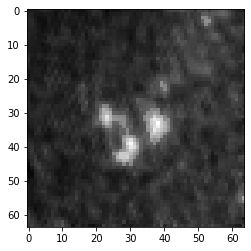

100%|██████████| 1/1 [00:02<00:00,  2.64s/it]


In [200]:

import argparse
import numpy as np
from skimage import io, util
from sklearn.feature_extraction import image
from sklearn import preprocessing
from ksvd import ApproximateKSVD
from tqdm import tqdm


# os.mkdir(path+'ksvd_result')
def clip(img):
    img = np.minimum(np.ones(img.shape), img)
    img = np.maximum(np.zeros(img.shape), img)
    return img
# imgs=sorted(glob(path+'image_dm3/resize_average/normalization_4_atoms-100015.tif'))
imgs=[path+'image_dm3/normalization_6_atoms_type1/6.150152.tif']
flag=0
for i in tqdm(imgs):
    img=plt.imread(i).astype('float')
#     img = plt.imread(path+"5A_2_test/5.24.20047.tif").astype('float')
#     noise=plt.imread(path+"image_dm3/normalization_5_atoms_type1/5.24.20047.tif").astype('float')
#     plt.imshow(noise,'gray')
#     plt.pause(0.01)

    patch_size = (5, 5)
    patches = image.extract_patches_2d(img, patch_size)
    signals = patches.reshape(patches.shape[0], -1)
    mean = np.mean(signals, axis=1)[:, np.newaxis]
    signals -= mean
    aksvd = ApproximateKSVD(n_components=5)
    dictionary = aksvd.fit(signals[:10000]).components_
    gamma = aksvd.transform(signals)
    reduced = gamma.dot(dictionary) + mean
    reduced_img = image.reconstruct_from_patches_2d(
        reduced.reshape(patches.shape), img.shape)
    reduced_img=rl_normalization(reduced_img).astype('float64')
    # reduced_img=np.exp(reduced_img-254)
    a=np.where(reduced_img<130)
    a=list(zip(a[0],a[1]))
    for i, j in a:
        reduced_img[i][j]=0.8*reduced_img[i][j]
    reduced_img=Image.fromarray(reduced_img)
    try:
        os.mkdir(path+f'added_ksvd_result/')
    except:
        pass
    reduced_img.save(path+f'added_ksvd_result/'+'152.tif')
    flag+=1
# reduced_img=cv2.threshold(reduced_img,50,255,type=3)[1]
    plt.imshow(reduced_img,'gray')
    plt.pause(0.01)

  0%|          | 0/162 [00:00<?, ?it/s]

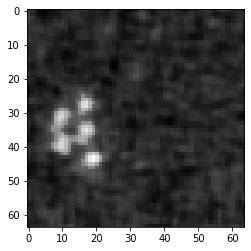

  1%|          | 1/162 [00:02<06:35,  2.46s/it]

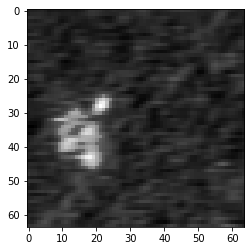

  1%|          | 2/162 [00:04<06:35,  2.47s/it]

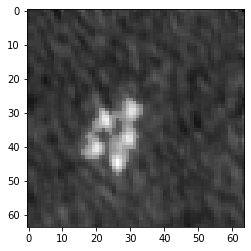

  2%|▏         | 3/162 [00:07<06:32,  2.47s/it]

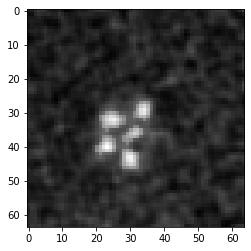

  2%|▏         | 4/162 [00:09<06:29,  2.47s/it]

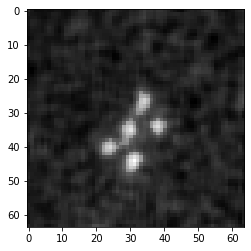

  3%|▎         | 5/162 [00:12<06:27,  2.47s/it]

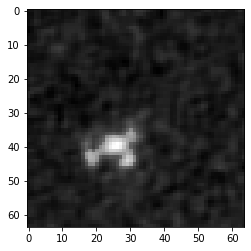

  4%|▎         | 6/162 [00:14<06:24,  2.47s/it]

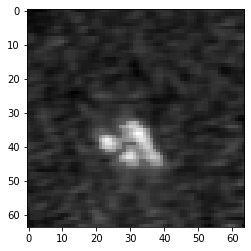

  4%|▍         | 7/162 [00:17<06:22,  2.47s/it]

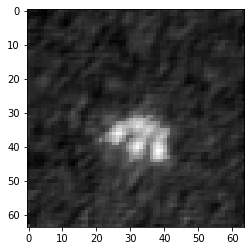

  5%|▍         | 8/162 [00:19<06:20,  2.47s/it]

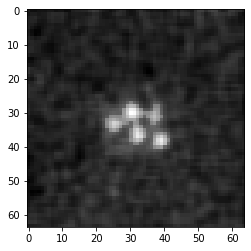

  6%|▌         | 9/162 [00:22<06:18,  2.47s/it]

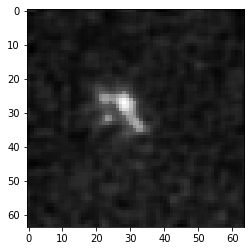

  6%|▌         | 10/162 [00:24<06:15,  2.47s/it]

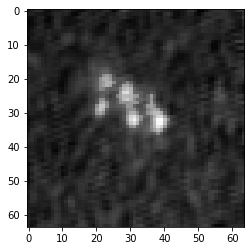

  7%|▋         | 11/162 [00:27<06:12,  2.47s/it]

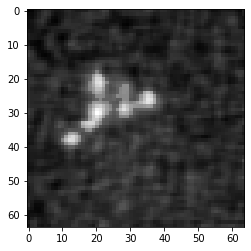

  7%|▋         | 12/162 [00:29<06:10,  2.47s/it]

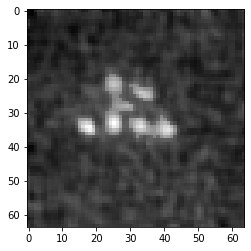

  8%|▊         | 13/162 [00:32<06:08,  2.47s/it]

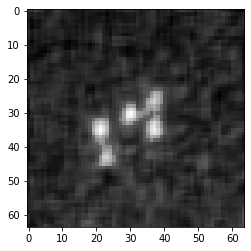

  9%|▊         | 14/162 [00:34<06:06,  2.48s/it]

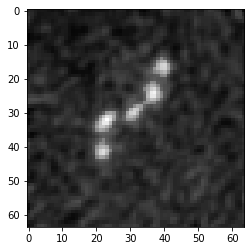

  9%|▉         | 15/162 [00:37<06:05,  2.49s/it]

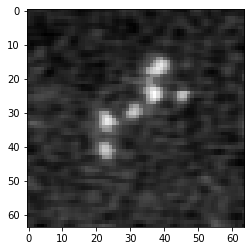

 10%|▉         | 16/162 [00:39<06:03,  2.49s/it]

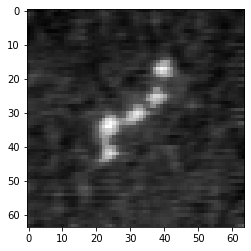

 10%|█         | 17/162 [00:42<06:00,  2.49s/it]

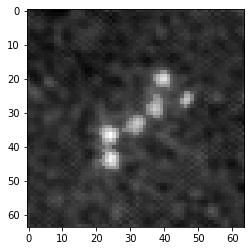

 11%|█         | 18/162 [00:44<05:59,  2.49s/it]

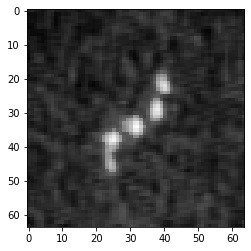

 12%|█▏        | 19/162 [00:47<05:54,  2.48s/it]

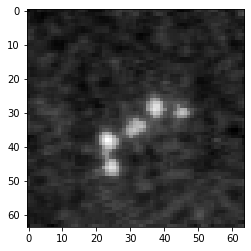

 12%|█▏        | 20/162 [00:49<05:52,  2.48s/it]

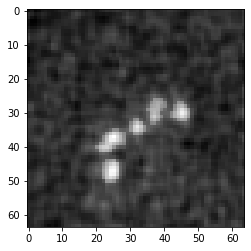

 13%|█▎        | 21/162 [00:52<05:49,  2.48s/it]

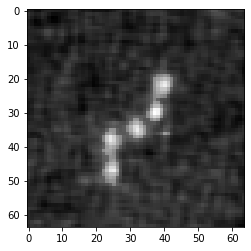

 14%|█▎        | 22/162 [00:54<05:45,  2.47s/it]

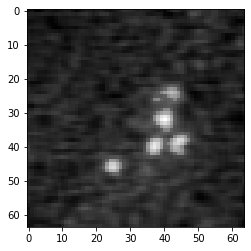

 14%|█▍        | 23/162 [00:56<05:43,  2.47s/it]

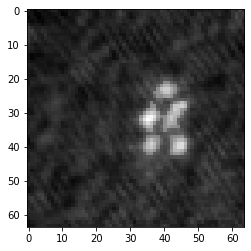

 15%|█▍        | 24/162 [00:59<05:43,  2.49s/it]

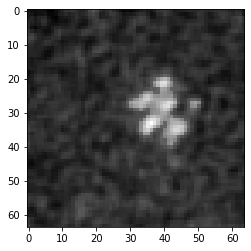

 15%|█▌        | 25/162 [01:01<05:41,  2.49s/it]

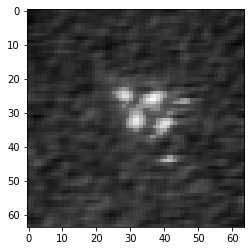

 16%|█▌        | 26/162 [01:04<05:39,  2.50s/it]

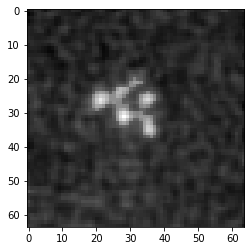

 17%|█▋        | 27/162 [01:06<05:36,  2.49s/it]

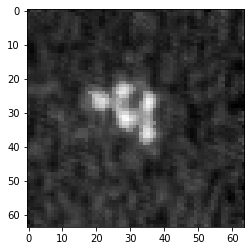

 17%|█▋        | 28/162 [01:09<05:32,  2.48s/it]

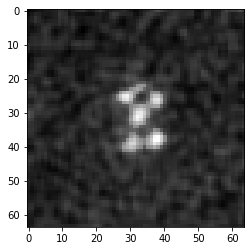

 18%|█▊        | 29/162 [01:11<05:29,  2.48s/it]

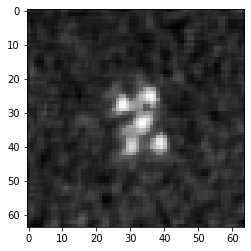

 19%|█▊        | 30/162 [01:14<05:26,  2.48s/it]

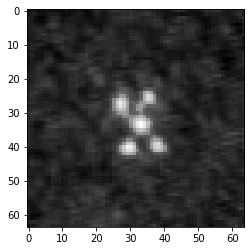

 19%|█▉        | 31/162 [01:16<05:24,  2.48s/it]

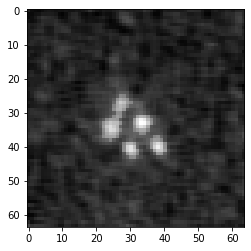

 20%|█▉        | 32/162 [01:19<05:21,  2.47s/it]

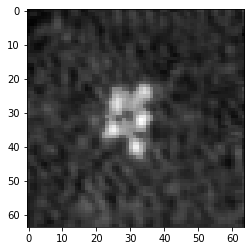

 20%|██        | 33/162 [01:21<05:19,  2.47s/it]

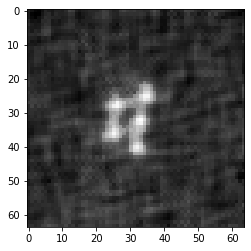

 21%|██        | 34/162 [01:24<05:16,  2.47s/it]

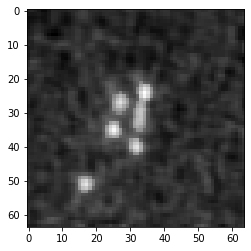

 22%|██▏       | 35/162 [01:26<05:13,  2.47s/it]

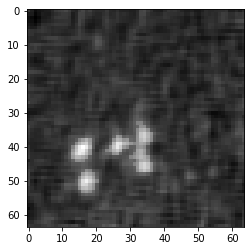

 22%|██▏       | 36/162 [01:29<05:10,  2.46s/it]

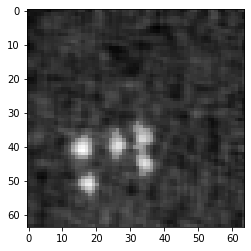

 23%|██▎       | 37/162 [01:31<05:08,  2.47s/it]

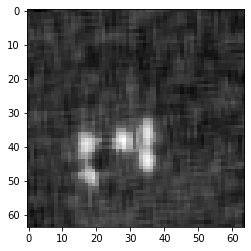

 23%|██▎       | 38/162 [01:34<05:06,  2.47s/it]

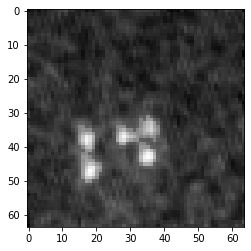

 24%|██▍       | 39/162 [01:36<05:04,  2.47s/it]

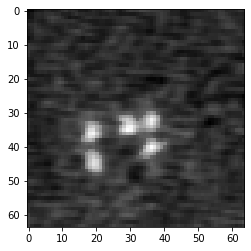

 25%|██▍       | 40/162 [01:39<05:01,  2.47s/it]

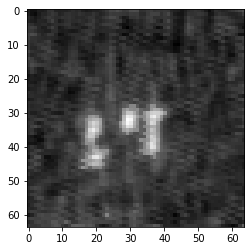

 25%|██▌       | 41/162 [01:41<05:00,  2.49s/it]

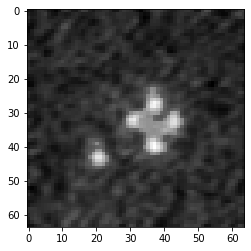

 26%|██▌       | 42/162 [01:44<04:57,  2.48s/it]

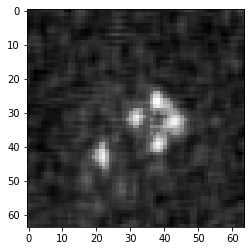

 27%|██▋       | 43/162 [01:46<04:55,  2.48s/it]

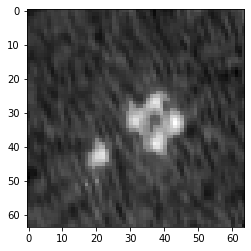

 27%|██▋       | 44/162 [01:49<04:53,  2.48s/it]

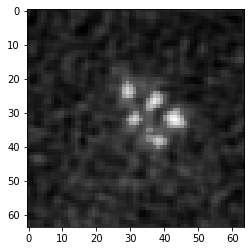

 28%|██▊       | 45/162 [01:51<04:50,  2.49s/it]

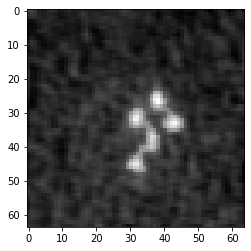

 28%|██▊       | 46/162 [01:54<04:49,  2.49s/it]

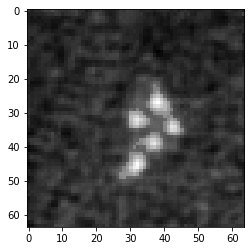

 29%|██▉       | 47/162 [01:56<04:46,  2.49s/it]

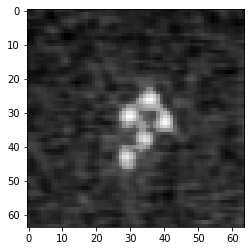

 30%|██▉       | 48/162 [01:58<04:41,  2.47s/it]

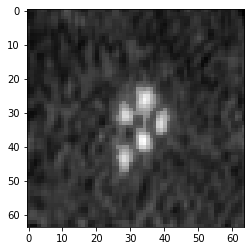

 30%|███       | 49/162 [02:01<04:38,  2.47s/it]

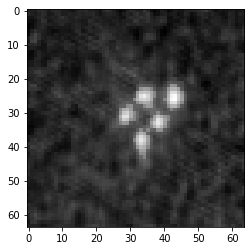

 31%|███       | 50/162 [02:03<04:35,  2.46s/it]

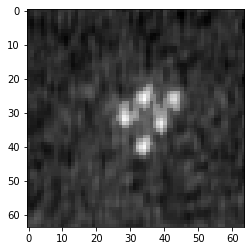

 31%|███▏      | 51/162 [02:06<04:33,  2.46s/it]

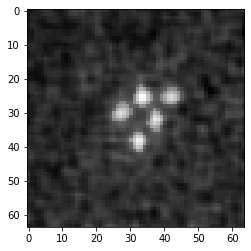

 32%|███▏      | 52/162 [02:08<04:30,  2.46s/it]

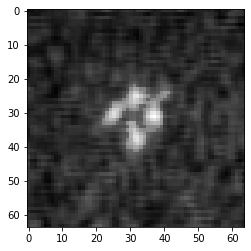

 33%|███▎      | 53/162 [02:11<04:26,  2.45s/it]

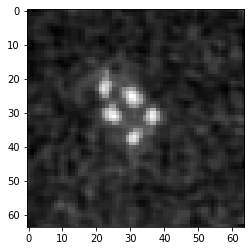

 33%|███▎      | 54/162 [02:13<04:23,  2.44s/it]

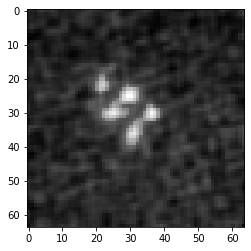

 34%|███▍      | 55/162 [02:16<04:20,  2.44s/it]

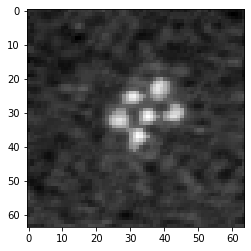

 35%|███▍      | 56/162 [02:18<04:21,  2.47s/it]

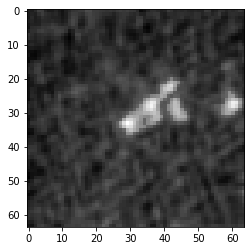

 35%|███▌      | 57/162 [02:21<04:18,  2.46s/it]

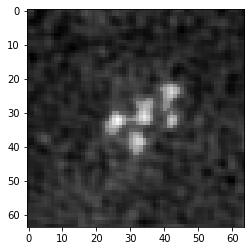

 36%|███▌      | 58/162 [02:23<04:16,  2.47s/it]

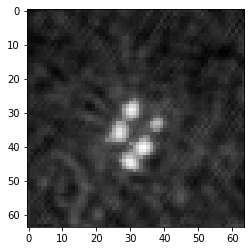

 36%|███▋      | 59/162 [02:25<04:13,  2.46s/it]

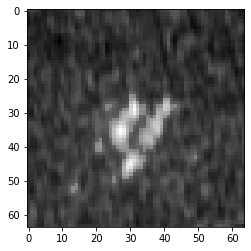

 37%|███▋      | 60/162 [02:28<04:12,  2.47s/it]

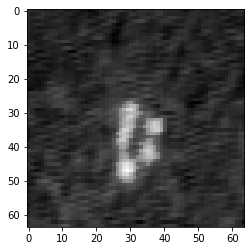

 38%|███▊      | 61/162 [02:30<04:09,  2.47s/it]

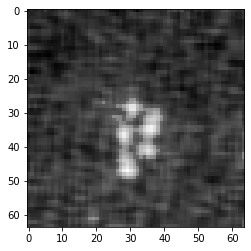

 38%|███▊      | 62/162 [02:33<04:08,  2.48s/it]

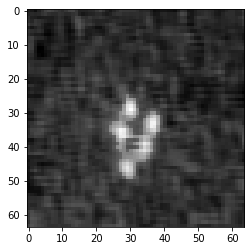

 39%|███▉      | 63/162 [02:35<04:06,  2.49s/it]

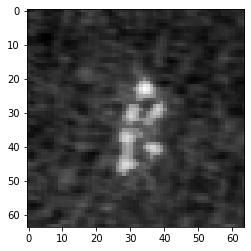

 40%|███▉      | 64/162 [02:38<04:03,  2.49s/it]

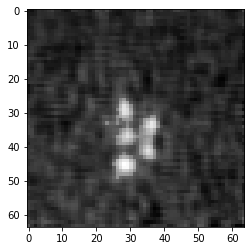

 40%|████      | 65/162 [02:40<04:00,  2.48s/it]

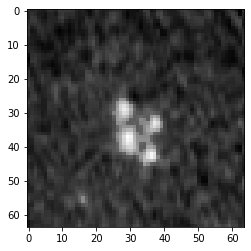

 41%|████      | 66/162 [02:43<03:57,  2.47s/it]

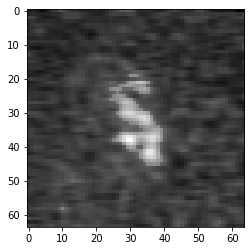

 41%|████▏     | 67/162 [02:45<03:54,  2.47s/it]

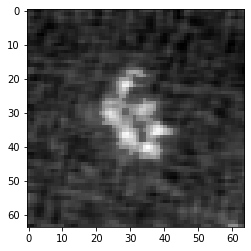

 42%|████▏     | 68/162 [02:48<03:52,  2.48s/it]

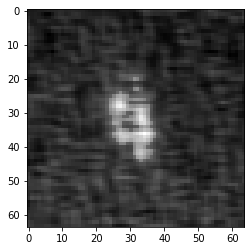

 43%|████▎     | 69/162 [02:50<03:49,  2.47s/it]

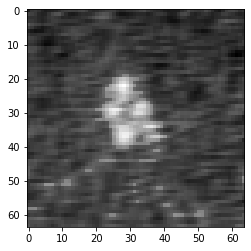

 43%|████▎     | 70/162 [02:53<03:46,  2.46s/it]

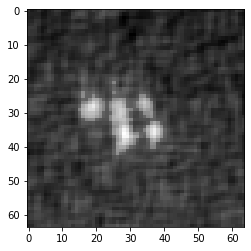

 44%|████▍     | 71/162 [02:55<03:42,  2.45s/it]

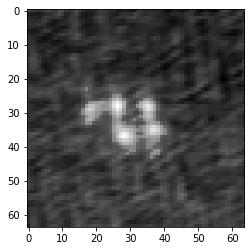

 44%|████▍     | 72/162 [02:58<03:40,  2.45s/it]

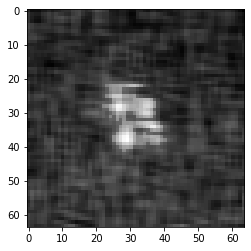

 45%|████▌     | 73/162 [03:00<03:38,  2.46s/it]

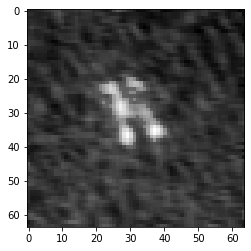

 46%|████▌     | 74/162 [03:02<03:35,  2.45s/it]

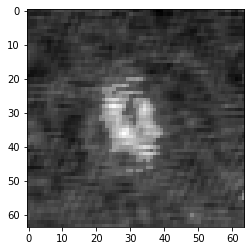

 46%|████▋     | 75/162 [03:05<03:33,  2.45s/it]

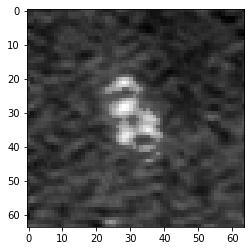

 47%|████▋     | 76/162 [03:07<03:31,  2.46s/it]

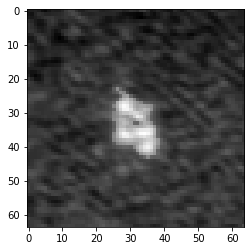

 48%|████▊     | 77/162 [03:10<03:29,  2.46s/it]

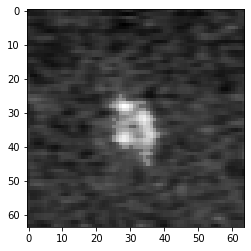

 48%|████▊     | 78/162 [03:12<03:27,  2.46s/it]

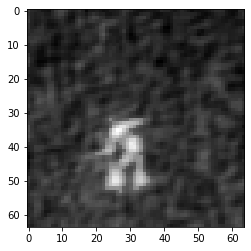

 49%|████▉     | 79/162 [03:15<03:26,  2.49s/it]

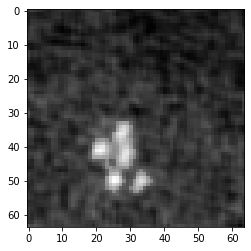

 49%|████▉     | 80/162 [03:17<03:23,  2.48s/it]

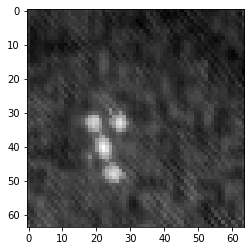

 50%|█████     | 81/162 [03:20<03:20,  2.48s/it]

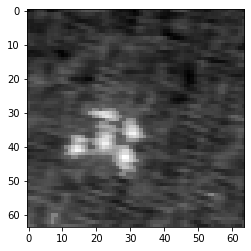

 51%|█████     | 82/162 [03:22<03:18,  2.48s/it]

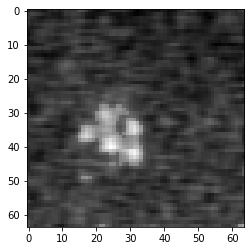

 51%|█████     | 83/162 [03:25<03:15,  2.47s/it]

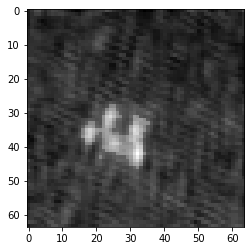

 52%|█████▏    | 84/162 [03:27<03:12,  2.47s/it]

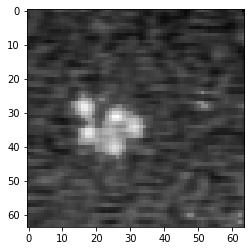

 52%|█████▏    | 85/162 [03:30<03:09,  2.46s/it]

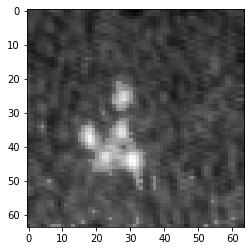

 53%|█████▎    | 86/162 [03:32<03:07,  2.47s/it]

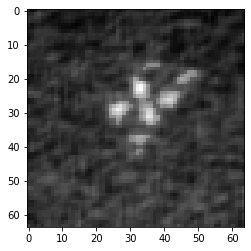

 54%|█████▎    | 87/162 [03:35<03:05,  2.47s/it]

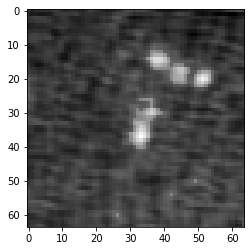

 54%|█████▍    | 88/162 [03:37<03:02,  2.47s/it]

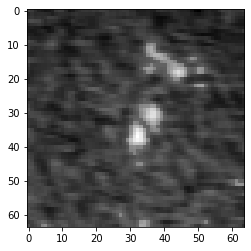

 55%|█████▍    | 89/162 [03:40<03:00,  2.47s/it]

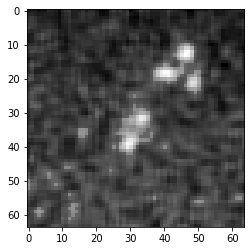

 56%|█████▌    | 90/162 [03:42<02:57,  2.47s/it]

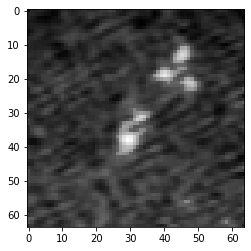

 56%|█████▌    | 91/162 [03:44<02:54,  2.46s/it]

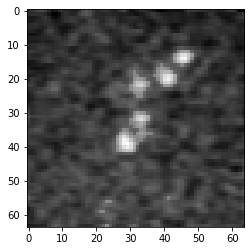

 57%|█████▋    | 92/162 [03:47<02:52,  2.46s/it]

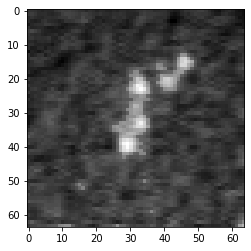

 57%|█████▋    | 93/162 [03:49<02:49,  2.46s/it]

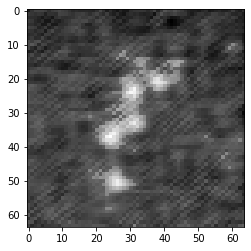

 58%|█████▊    | 94/162 [03:52<02:46,  2.45s/it]

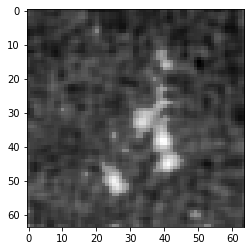

 59%|█████▊    | 95/162 [03:54<02:44,  2.45s/it]

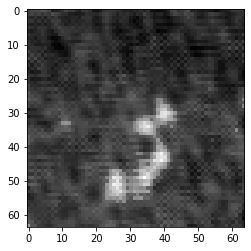

 59%|█████▉    | 96/162 [03:57<02:41,  2.45s/it]

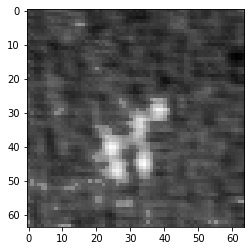

 60%|█████▉    | 97/162 [03:59<02:39,  2.45s/it]

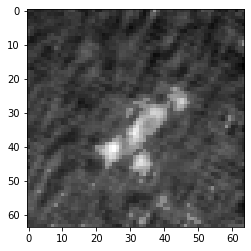

 60%|██████    | 98/162 [04:02<02:37,  2.46s/it]

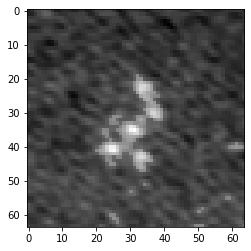

 61%|██████    | 99/162 [04:04<02:34,  2.46s/it]

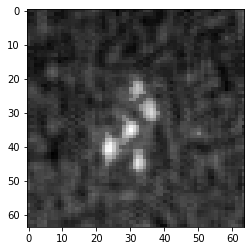

 62%|██████▏   | 100/162 [04:07<02:32,  2.45s/it]

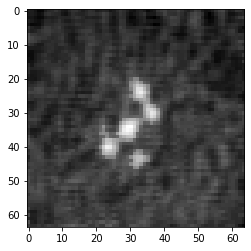

 62%|██████▏   | 101/162 [04:09<02:29,  2.45s/it]

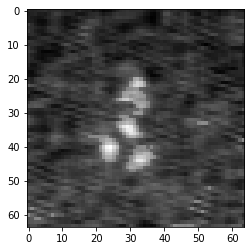

 63%|██████▎   | 102/162 [04:11<02:26,  2.45s/it]

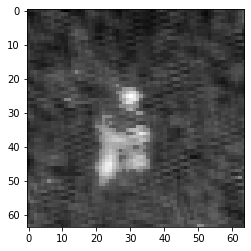

 64%|██████▎   | 103/162 [04:14<02:24,  2.45s/it]

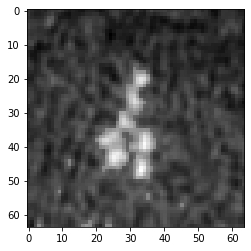

 64%|██████▍   | 104/162 [04:16<02:22,  2.45s/it]

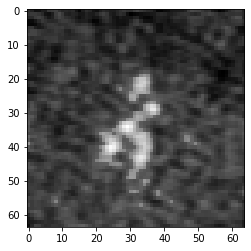

 65%|██████▍   | 105/162 [04:19<02:19,  2.45s/it]

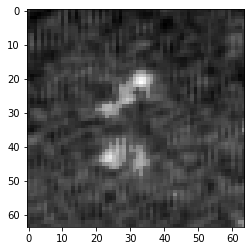

 65%|██████▌   | 106/162 [04:21<02:17,  2.45s/it]

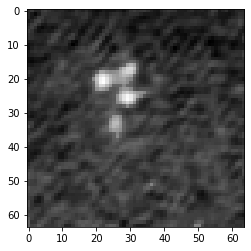

 66%|██████▌   | 107/162 [04:24<02:14,  2.45s/it]

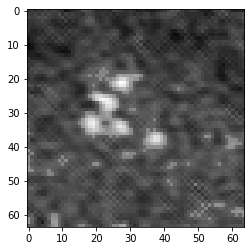

 67%|██████▋   | 108/162 [04:26<02:12,  2.46s/it]

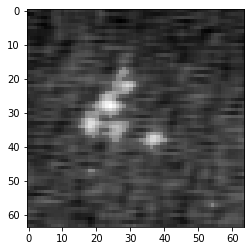

 67%|██████▋   | 109/162 [04:29<02:10,  2.46s/it]

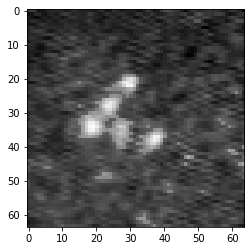

 68%|██████▊   | 110/162 [04:31<02:08,  2.47s/it]

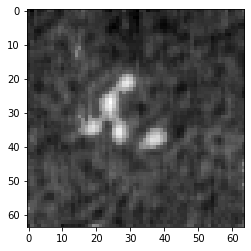

 69%|██████▊   | 111/162 [04:34<02:06,  2.47s/it]

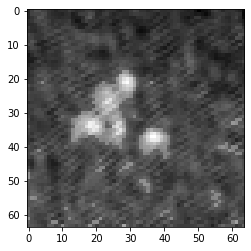

 69%|██████▉   | 112/162 [04:36<02:03,  2.47s/it]

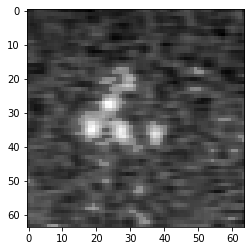

 70%|██████▉   | 113/162 [04:39<02:01,  2.48s/it]

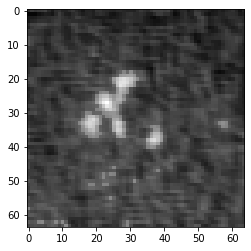

 70%|███████   | 114/162 [04:41<01:58,  2.48s/it]

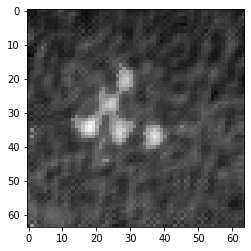

 71%|███████   | 115/162 [04:43<01:55,  2.47s/it]

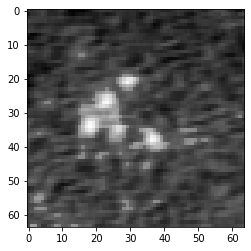

 72%|███████▏  | 116/162 [04:46<01:54,  2.48s/it]

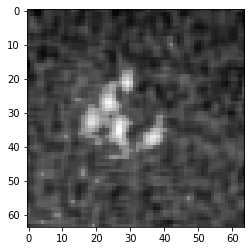

 72%|███████▏  | 117/162 [04:48<01:51,  2.48s/it]

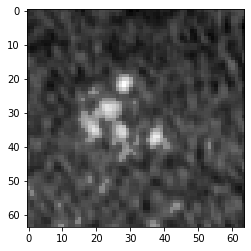

 73%|███████▎  | 118/162 [04:51<01:49,  2.48s/it]

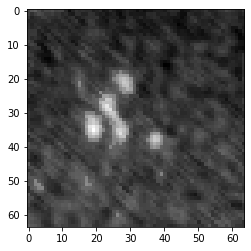

 73%|███████▎  | 119/162 [04:53<01:46,  2.48s/it]

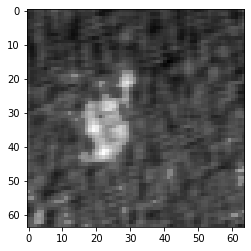

 74%|███████▍  | 120/162 [04:56<01:43,  2.47s/it]

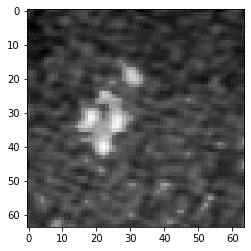

 75%|███████▍  | 121/162 [04:58<01:41,  2.47s/it]

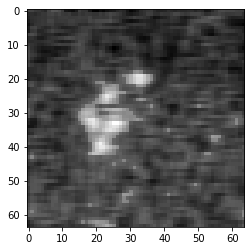

 75%|███████▌  | 122/162 [05:01<01:39,  2.48s/it]

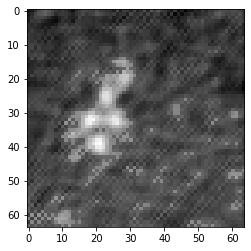

 76%|███████▌  | 123/162 [05:03<01:36,  2.47s/it]

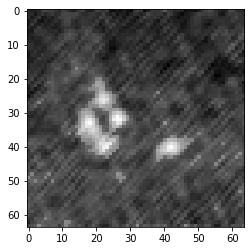

 77%|███████▋  | 124/162 [05:06<01:34,  2.48s/it]

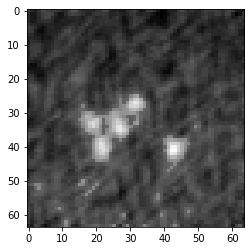

 77%|███████▋  | 125/162 [05:08<01:31,  2.48s/it]

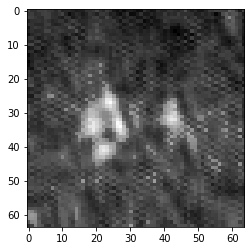

 78%|███████▊  | 126/162 [05:11<01:29,  2.48s/it]

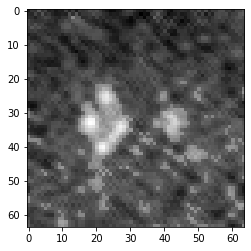

 78%|███████▊  | 127/162 [05:13<01:26,  2.48s/it]

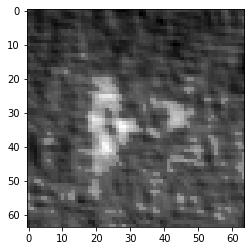

 79%|███████▉  | 128/162 [05:16<01:24,  2.48s/it]

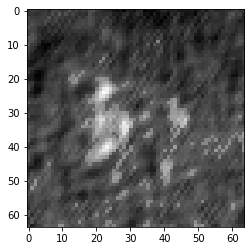

 80%|███████▉  | 129/162 [05:18<01:21,  2.48s/it]

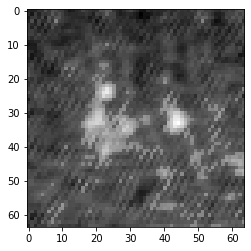

 80%|████████  | 130/162 [05:21<01:19,  2.47s/it]

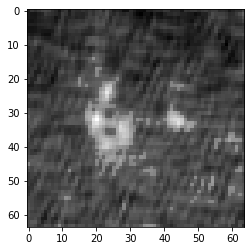

 81%|████████  | 131/162 [05:23<01:16,  2.47s/it]

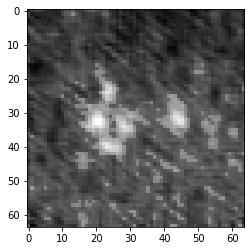

 81%|████████▏ | 132/162 [05:26<01:13,  2.46s/it]

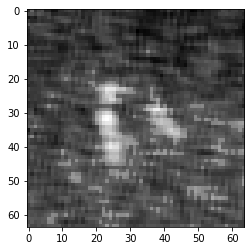

 82%|████████▏ | 133/162 [05:28<01:11,  2.47s/it]

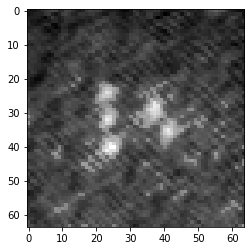

 83%|████████▎ | 134/162 [05:31<01:09,  2.48s/it]

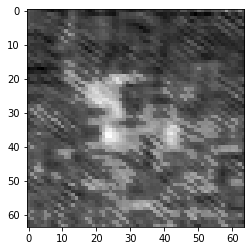

 83%|████████▎ | 135/162 [05:33<01:06,  2.48s/it]

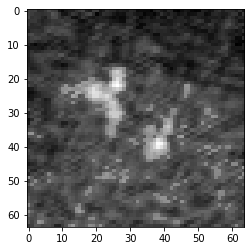

 84%|████████▍ | 136/162 [05:35<01:04,  2.47s/it]

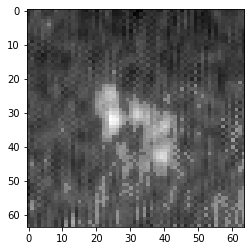

 85%|████████▍ | 137/162 [05:38<01:01,  2.48s/it]

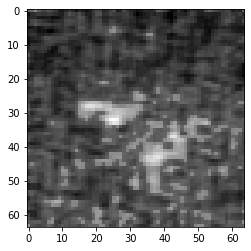

 85%|████████▌ | 138/162 [05:40<00:59,  2.48s/it]

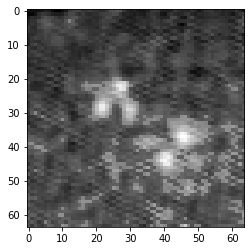

 86%|████████▌ | 139/162 [05:43<00:56,  2.47s/it]

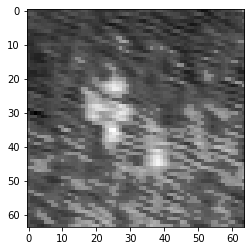

 86%|████████▋ | 140/162 [05:45<00:54,  2.47s/it]

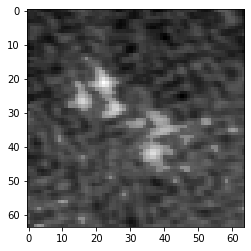

 87%|████████▋ | 141/162 [05:48<00:51,  2.47s/it]

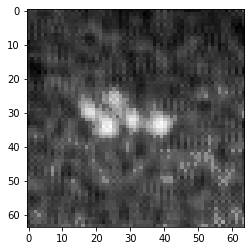

 88%|████████▊ | 142/162 [05:50<00:49,  2.48s/it]

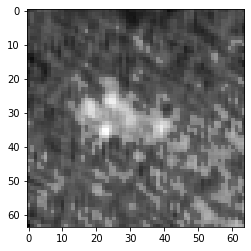

 88%|████████▊ | 143/162 [05:53<00:47,  2.48s/it]

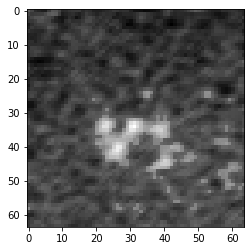

 89%|████████▉ | 144/162 [05:55<00:44,  2.48s/it]

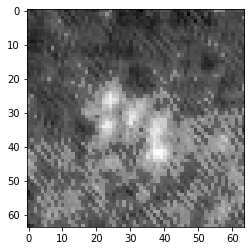

 90%|████████▉ | 145/162 [05:58<00:42,  2.48s/it]

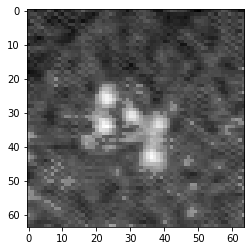

 90%|█████████ | 146/162 [06:00<00:39,  2.48s/it]

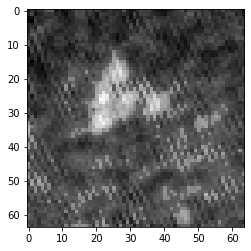

 91%|█████████ | 147/162 [06:03<00:37,  2.47s/it]

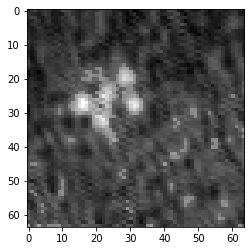

 91%|█████████▏| 148/162 [06:05<00:34,  2.47s/it]

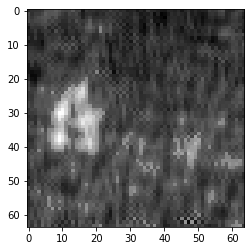

 92%|█████████▏| 149/162 [06:08<00:32,  2.47s/it]

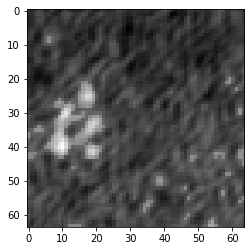

 93%|█████████▎| 150/162 [06:10<00:29,  2.47s/it]

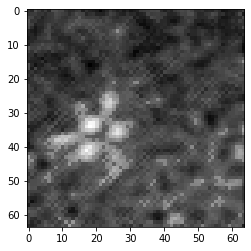

 93%|█████████▎| 151/162 [06:13<00:27,  2.47s/it]

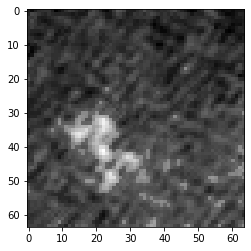

 94%|█████████▍| 152/162 [06:15<00:24,  2.47s/it]

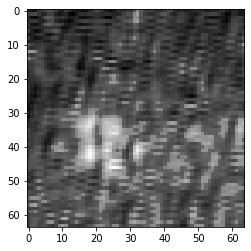

 94%|█████████▍| 153/162 [06:18<00:22,  2.47s/it]

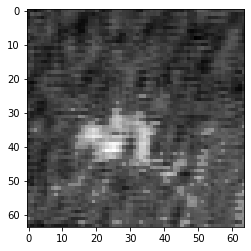

 95%|█████████▌| 154/162 [06:20<00:19,  2.48s/it]

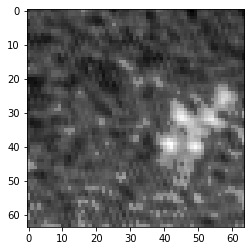

 96%|█████████▌| 155/162 [06:23<00:17,  2.50s/it]

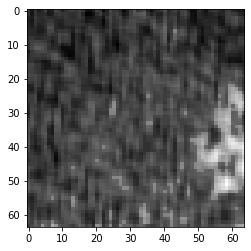

 96%|█████████▋| 156/162 [06:25<00:15,  2.51s/it]

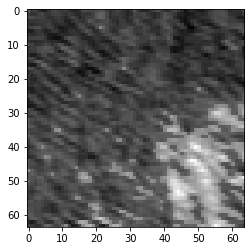

 97%|█████████▋| 157/162 [06:28<00:12,  2.50s/it]

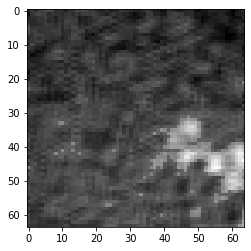

 98%|█████████▊| 158/162 [06:30<00:10,  2.51s/it]

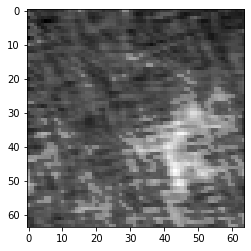

 98%|█████████▊| 159/162 [06:33<00:07,  2.51s/it]

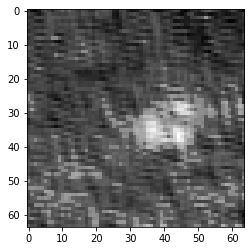

 99%|█████████▉| 160/162 [06:35<00:05,  2.50s/it]

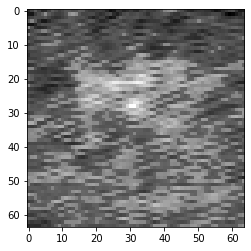

 99%|█████████▉| 161/162 [06:38<00:02,  2.50s/it]

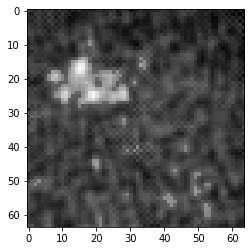

100%|██████████| 162/162 [06:40<00:00,  2.47s/it]


In [84]:
import argparse
import numpy as np
from skimage import io, util
from sklearn.feature_extraction import image
from sklearn import preprocessing
from ksvd import ApproximateKSVD
from tqdm import tqdm


# os.mkdir(path+'ksvd_result')
def clip(img):
    img = np.minimum(np.ones(img.shape), img)
    img = np.maximum(np.zeros(img.shape), img)
    return img
imgs=sorted(glob(path+'image_dm3/normalization_5_atoms_type1/*.tif'))
flag=0
for i in tqdm(imgs):
    img=plt.imread(i).astype('float')
#     img = plt.imread(path+"5A_2_test/5.24.20047.tif").astype('float')
#     noise=plt.imread(path+"image_dm3/normalization_5_atoms_type1/5.24.20047.tif").astype('float')
#     plt.imshow(noise,'gray')
#     plt.pause(0.01)

    patch_size = (5, 5)
    patches = image.extract_patches_2d(img, patch_size)
    signals = patches.reshape(patches.shape[0], -1)
    mean = np.mean(signals, axis=1)[:, np.newaxis]
    signals -= mean
    aksvd = ApproximateKSVD(n_components=5)
    dictionary = aksvd.fit(signals[:10000]).components_
for i in tqdm(imgs):  
    img=plt.imread(i).astype('float')
#     img = plt.imread(path+"5A_2_test/5.24.20047.tif").astype('float')
#     noise=plt.imread(path+"image_dm3/normalization_5_atoms_type1/5.24.20047.tif").astype('float')
#     plt.imshow(noise,'gray')
#     plt.pause(0.01)

    patch_size = (5, 5)
    patches = image.extract_patches_2d(img, patch_size)
    signals = patches.reshape(patches.shape[0], -1)
    mean = np.mean(signals, axis=1)[:, np.newaxis]
    signals -= mean
    aksvd = ApproximateKSVD(n_components=5)
    dictionary = aksvd.fit(signals[:10000]).components_    
    gamma = aksvd.transform(signals)
    reduced = gamma.dot(dictionary) + mean
    reduced_img = image.reconstruct_from_patches_2d(
        reduced.reshape(patches.shape), img.shape)
    reduced_img=rl_normalization(reduced_img).astype('float64')
    # reduced_img=np.exp(reduced_img-254)
    a=np.where(reduced_img<130)
    a=list(zip(a[0],a[1]))
    for i, j in a:
        reduced_img[i][j]=0.8*reduced_img[i][j]
    reduced_img=Image.fromarray(reduced_img)
#     reduced_img.save(path+f'ksvd_result/{flag}.tif')
    flag+=1
# reduced_img=cv2.threshold(reduced_img,50,255,type=3)[1]
    plt.imshow(reduced_img,'gray')
    plt.pause(0.01)

In [ ]:
ori = cv2.imread(path+"image_dm3/normalization_5_atoms_type1/5.24.20047.tif",0).astype(np.float)
#像素丢失后的图
# img=pixel_miss(ori)
img=cv2.imread(path+"image_dm3/normalization_5_atoms_type1/5.24.20047.tif",0).astype(np.float)
#训练字典所用的图
train = cv2.imread(path+"5A_2_test/5.24.20047.tif",0).astype(np.float)

In [2]:
############## block KSVD #####################
imgs=glob(path+'image_dm3/normalization_5_atoms_type1/*.tif')
patch_size=(10,10)
# os.mkdir(path+'KSVD_result')
for img in imgs:
    i=plt.imread(img).astype('float64')
    patches=image.extract_patches_2d(i,patch_size)
    signals=patches.reshape(patches.shape[0], -1)
    mean = np.mean(signals, axis=1)[:, np.newaxis]
    signals -= mean
    aksvd = ApproximateKSVD(n_components=32)
    dictionary=aksvd.fit(i).components_
    dictionary = aksvd.fit(signals[:10000]).components_
    gamma = aksvd.transform(signals)
    reduced = gamma.dot(dictionary) + mean
    reduced_img = rl_normalization(image.reconstruct_from_patches_2d(
    reduced.reshape(patches.shape), i.shape))    
#     reduced_img=cv2.threshold(reduced_img,100,255,type=3)[1]
    plt.imshow(reduced_img,'gray')
    plt.pause(0.01)
    de=Image.fromarray(reduced_img)
    de.save(path+'KSVD_result/'+img.split('/')[-1])

NameError: name 'rl_normalization' is not defined

In [30]:
##### block 2 ##########
# i: ground truth
#j: denoised image
# p: noisy image
def mea_isnr(i,p,j):
    dif1=(j-i)**2
    dif2=(p-i)**2
    val1=np.sum(dif1)
    val2=np.sum(dif2)
 
    return 10*np.log10(val2/val1)
### rename ###
np.set_printoptions(threshold=np.inf)
def normalization_post(data):
    data=data.astype('float32')
    val_min=np.median(data.flatten())
#     val_min=np.min(data)
    _range = np.max(data) - val_min

#     print()
#     print(np.max(data))
#     _range = np.max(data) - 0
    data=abs(data - val_min) / (_range)
#     data=(data - 0) / (_range)
    # data=-1+data*2
    return data*255
def normalization_post1(data):
    data=data.astype('float32')
#     val_min=np.median(data.flatten())
    val_min=np.min(data)
    _range = np.max(data) - val_min
   
#     print()
#     print(np.max(data))
#     _range = np.max(data) - 0
    data=abs(data - val_min) / (_range)
#     data=(data - 0) / (_range)
    # data=-1+data*2
    return data*255

def rl_normalization(data):
    data=data.astype('float32')
#     val_min=np.median(data.flatten())
    val_min=np.min(data[np.nonzero(data)])
    for i in range(64):
        for j in range(64):
            if data[i][j]<val_min:
                data[i][j]=val_min
    _range = np.max(data) - val_min
    data=abs(data - val_min) / (_range)
    for i in range(58):
        for j in range(58):
            if data[i][j]<0:
                data[i][j]=0
#     data=(data - 0) / (_range)
    # data=-1+data*2
    return data*255    

(76, 76)
(76, 76)


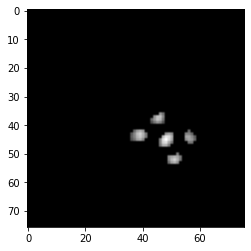

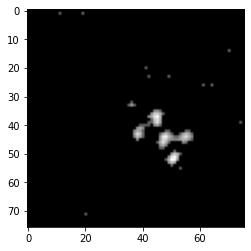

<ipython-input-268-201de4ba4308>:20: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  measure.compare_ssim(pd,gt)


0.8847961455617057

In [268]:
path='/home/hongyu/Lab_project/3D/'
gt=plt.imread(path+'added_test_gt/4.300015.tif')
gt=normalization_post1(gt).astype('uint8')
pd=plt.imread(path+'added_ksvd_result/15.tif')
pd=normalization_post1(pd).astype('uint8')

gt=cv2.threshold(gt,30,255,type=3)[1]
pd=cv2.threshold(pd,90,255,type=3)[1]
# save_gt=Image.fromarray(gt)
# save_gt.save(path+'added_test_gt/4.300299.tif')
save_pd=Image.fromarray(pd)
save_pd.save(path+'basedline/ad_61523.tif')
# gt=gt[3:-3,3:-3]
print(gt.shape)
print(pd.shape)
plt.imshow(gt,'gray')
plt.pause(0.01)
plt.imshow(pd,'gray')
plt.pause(0.01) 
measure.compare_ssim(pd,gt)

In [171]:
gt

array([[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100, 100, 100, 100, 100],
       

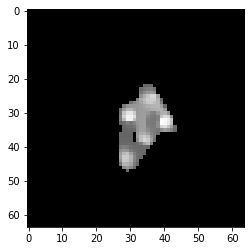

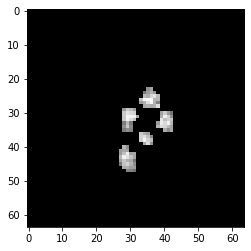

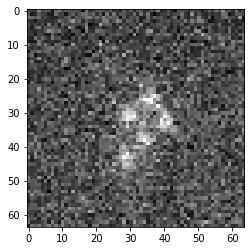

20.788808001816793
0.9275909101436646
30.912517131709354


<ipython-input-233-fa82a9a9f281>:46: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr+=measure.compare_psnr(img,eval(f'stable0'),255)
<ipython-input-233-fa82a9a9f281>:47: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim+=measure.compare_ssim(img,eval(f'stable0'))


In [233]:
path='/home/hongyu/Lab_project/3D/'
# files=sorted([path+'/anositropic_result/normalization_5_atoms_type1-iter1000079.tif',path+'anositropic_result/normalization_5_atoms_type1-iter1000080.tif',path+'anositropic_result/normalization_5_atoms_type1-iter1000081.tif'])

files=[path+'/anositropic_result/normalization_5_atoms_type1-iter1000047.tif']
sudden0=plt.imread(path+'5A_2_test/5.24.20079.tif')
sudden1=plt.imread(path+'5A_2_test/5.24.20080.tif')
sudden2=plt.imread(path+'5A_2_test/5.24.20081.tif')
stable0=plt.imread(path+'5A_2_test/5.24.20047.tif')
stable1=plt.imread(path+'5A_2_test/5.24.20048.tif')
stable2=plt.imread(path+'5A_2_test/5.24.20049.tif')
stable0=normalization_post1(stable0).astype('uint8')
sudden0_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20079.tif')
sudden1_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20080.tif')
sudden2_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20081.tif')
stable0_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20047.tif')
stable1_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20048.tif')
stable2_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20049.tif')
stable0_ori=normalization_post1(stable0_ori).astype('uint8')
sudden1_ori=normalization_post1(sudden1_ori)
sudden2_ori=normalization_post1(sudden2_ori)
stable0_ori=normalization_post1(stable0_ori)
stable1_ori=normalization_post1(stable1_ori)
stable2_ori=normalization_post1(stable2_ori)

psnr=0
ssim=0
imgs=[]
isnr=0
for f in files:
    imgs.append(normalization_post1(plt.imread(f)))
flag=0
for img in imgs:
    img=normalization_post1(img)
    img=cv2.threshold(img,100,255,type=3)[1]
#     img=rl_normalization(img)
    img=img.astype('uint8')
    plt.imshow(img,'gray')
    plt.pause(0.01)
    plt.imshow(eval(f'stable{flag}'),'gray')
    plt.pause(0.01)    
    plt.imshow(eval(f'stable{flag}_ori'),'gray')
    plt.pause(0.01)      
    ker=(3,3)
    sigma=0.1
#     img=cv2.GaussianBlur(img,ker,sigma)
    psnr+=measure.compare_psnr(img,eval(f'stable0'),255)
    ssim+=measure.compare_ssim(img,eval(f'stable0'))
    isnr+=mea_isnr(stable0,stable0_ori,img)
    flag+=1
print(psnr)
print(ssim)
print(isnr)



In [235]:
mea_isnr(stable0,stable0_ori,img)

30.912517131709354

In [239]:
img


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [128]:
glob(path+f'average_times/*16_3series_7_7_7_20hidden*')

['/home/hongyu/Lab_project/3D/average_times/A_2_16_3series_7_7_7_20hidden_avrgback2334_39378_ratio3_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/average_times/A_2_16_3series_7_7_7_20hidden_avrgback2334_39378_ratio3_circle_normalization_5_atoms_type1']

In [114]:
glob(path+f'average_times/*')

['/home/hongyu/Lab_project/3D/average_times/A_2_16_5series_7_7_5_10hidden_avrgback2274_39378_ratio3_circle_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/average_times/A_2_16_5series_7_7_5_25hidden_avrgback3430_39378_ratio2_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/average_times/A_2_16_5series_7_7_5_25hidden_avrgback2274_39378_ratio3_circle_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/average_times/A_2_16_6series_7_7_7_15hidden_avrgback2211_39378_ratio3_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/average_times/A_2_16_3series_7_7_7_20hidden_avrgback2334_39378_ratio3_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/average_times/A_2_16_4series_7_7_5_15hidden_avrgback3610_39378_ratio2_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/average_times/A_2_16_1series_7_7_3_25hidden_avrgback3695_39378_ratio2_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/average_times/A_2_16_2series_7_7_5_15hidden_av

frame # :  2
['/home/hongyu/Lab_project/3D/teaching_data/7_7_5/6A_2/2/Result of Result.tif']
15750.0
26.0


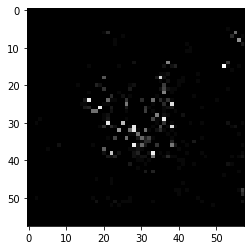

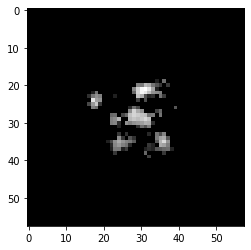

atom_area: 26.838086079233495
background_area: 41.51654868471118
SSIM atom_area:  0.9284405061611776
SSIM background_area:  0.8996371402389851


<ipython-input-10-4dcadfc26626>:88: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  print('atom_area:',measure.compare_psnr(img_p_atom,img_t_atom,255))
<ipython-input-10-4dcadfc26626>:89: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  print('background_area:',measure.compare_psnr(img_p_bg,img_t_bg,255))
<ipython-input-10-4dcadfc26626>:106: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  print('SSIM atom_area: ',measure.compare_ssim(img_p_atom,img_t_atom))
<ipython-input-10-4dcadfc26626>:107: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed fr

In [10]:
#################### PSNR #####################
# ratio=['63','71','81','114','142','189','285','570']
ratio=['570']
ker_size='7_7_7'
hidden_num='10'
thresh=25000

params={
    
    2:{'num':'860','thresh':'28000'},
    3:{'num':'1340','thresh':'28000'},
    4:{'num':'1720','thresh':'28000'}
}
record={}
for ker in ['7_7_1','7_7_2','7_7_3','7_7_5','7_7_7']:
    for no in range(1,17):
        for num_hidden in [10,15,20,25]:
# for jj in [2]:
#     for r in ratio:
#         print('frame # : ',jj)
    #     p_dir='/home/hongyu/Lab_project/3D/reborn_result/'+ker_size+'_try_570resize_average_'+hidden_num+'/918.tif'
#         p_dir=f'/home/hongyu/Lab_project/3D/reborn_result/'+ker_size+f'_try_570resize_average_{j}/920.tif'
                aa=params[jj]['num']
                bb=params[jj]['thresh']
        #         p_dir=f'/home/hongyu/Lab_project/3D/reborn_result/430_{jj}_circle_{ker_size}_10hidden_{aa}_19th_nor_{bb}_series/215.tif'
        #         p_dir=f'/home/hongyu/Lab_project/3D/reborn_result/430_circle_7_7_7_10hidden_390_19th_nor_{bb}_series/919.tif'
                p_dir=f'/home/hongyu/Lab_project/3D/reborn_result/trained_by_6A_2/6A_2_7_7_5_10hidden_avrgback3110_28000_series_normalization_6_atoms_type1/52.tif'
                fs_t=['/home/hongyu/Lab_project/3D/teaching_data/7_7_5/6A_2/2/Result of Result.tif']
                print(fs_t)
                PSNR=[]
                for f in fs_t:
                    img_t=plt.imread(f)

                    img_t=img_t[3:-3,3:-3]
        #             fill=img_t[6][6]

        #             for i in range(len(img_t)):
        #                 for j in range(len(img_t[0])):
        #                     if img_t[i][j]<thresh:
        #                         img_t[i][j]=fill          
            #         img_t=nor_255(img_t)

                    img_t=normalization_post(img_t)

                    img_t_atom=cv2.threshold(img_t,30,255,type=3)[1]
                    img_t_bg=cv2.threshold(img_t,30,255,type=4)[1]
                #     img_p=plt.imread(p_dir+f.split('/')[-1])
                    img_p=plt.imread(p_dir)



        #             print('zuixiao',np.min(img_p))
                    img_t=img_t.astype('uint8')

        #             outlayer=list(zip(*np.where(img_p==0)))
        #             for i in outlayer:
        #                 img_p[i[0]][i[1]]=50
        #             img_p1=normalization_post1(img_p)
                    img_p=normalization_post(img_p)
                    img_p=img_p.astype('uint8')
                    img_p[:5][:]=0
                    img_p[:][:5]=0
                    img_p[-5:][:]=0
                    img_p[:][-5:]=0

                    img_p_atom=cv2.threshold(img_p,30,255,type=3)[1]
                    img_p_bg=cv2.threshold(img_p,30,255,type=4)[1]
                    plt.imshow(img_p_bg,'gray')
                    plt.pause(0.01)
                    plt.imshow(img_p_atom,'gray')
                    plt.pause(0.01)            
        #             print(img_p_bg)
        #             print(img_p_bg)




        #             img_p=cv2.threshold(img_p,20,255,type=3)[1]
        #             plt.imshow(img_t,'gray')
        #             plt.pause(0.01)
        #             plt.imshow(img_t,'gray')
        #             plt.pause(0.01)
        #             plt.imshow(img_p,'gray')
        #             plt.pause(0.01)




                # sum(PSNR)/30
            #     print(PSNR)

                print('atom_area:',emasure.compare_psnr(img_p_atom,img_t_atom,255))
                print('background_area:',measure.compare_psnr(img_p_bg,img_t_bg,255))
        #         print('total:',measure.compare_psnr(img_p,img_t,255))

            # for r in ratio:
            #     p_dir='/home/hongyu/Lab_project/3D/reborn_result/7_7_3_try_570resize_average_'+hidden_num+'/920.tif'

            #     fs_t=['/home/hongyu/Lab_project/3D/teaching_data/evaluation_used/4.300921.tif']
            #     print(fs_t)
            #     SSIM=[]
            #     for f in fs_t:

            #         img_t=plt.imread(f)
            #         img_t=img_t[3:-3,3:-3]
            #         img_p=plt.imread(p_dir)
            #         img_t=img_t.astype(np.float64)
            #         img_p=img_p.astype(np.float64)
            #         SSIM.append(calculate_ssim(img_t,img_p))
                print('SSIM atom_area: ',measure.compare_ssim(img_p_atom,img_t_atom))
                print('SSIM background_area: ',measure.compare_ssim(img_p_bg,img_t_bg))
#         print('SSIM ',measure.compare_ssim(img_p,img_t))

frame # :  10
0.0


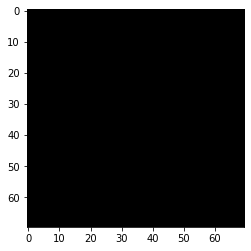

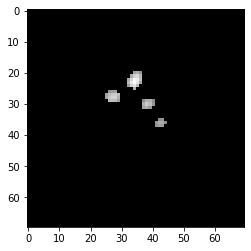

0.0
atom_area: 23.298505599507962
background_area: 39.152177306680144
SSIM atom_area:  0.8727453257665072
SSIM background_area:  0.8073101262742215


<ipython-input-22-b4ab4f284600>:89: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  print('atom_area:',measure.compare_psnr(img_p_atom,img_t_atom,255))
<ipython-input-22-b4ab4f284600>:90: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  print('background_area:',measure.compare_psnr(img_p_bg,img_t_bg,255))
<ipython-input-22-b4ab4f284600>:105: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  print('SSIM atom_area: ',measure.compare_ssim(img_p_atom,img_t_atom))
/home/hongyu/anaconda3/lib/python3.8/site-packages/skimage/measure/_structural_similarity.py:13: UserWarning: Inputs have mismatched dtype.  Setting data_range based on 

In [22]:
#################### PSNR #####################
# ratio=['63','71','81','114','142','189','285','570']
ratio=['570']
ker_size='7_7_7'
hidden_num='10'
thresh=25000
test_files=['5.24.20114','5.24.20138','5.24.20145','5.24.20152']
params={
    
    2:{'num':'860','thresh':'28000'},
    3:{'num':'1340','thresh':'28000'},
    4:{'num':'1720','thresh':'28000'}
}
for jj in [10]:
    for r in ratio:
        print('frame # : ',jj)
    #     p_dir='/home/hongyu/Lab_project/3D/reborn_result/'+ker_size+'_try_570resize_average_'+hidden_num+'/918.tif'
#         p_dir=f'/home/hongyu/Lab_project/3D/reborn_result/'+ker_size+f'_try_570resize_average_{j}/920.tif'
#         aa=params[jj]['num']
#         bb=params[jj]['thresh']
        p_dir=f'/home/hongyu/Lab_project/3D/reborn_result/430_circle_{ker_size}_{jj}hidden_390_19th_nor_28000_series/214.tif'
        
#         p_dir=f'/home/hongyu/Lab_project/3D/reborn_result/430_circle_7_7_7_10hidden_390_19th_nor_{bb}_series/919.tif'
#         fs_t=['/home/hongyu/Lab_project/3D/teaching_data/10218.tif']

        fs_t=['/home/hongyu/Lab_project/3D/teaching_data/10217.tif']
        
        PSNR=[]
        for f in fs_t:
            img_t=plt.imread(f)

            img_t=img_t[3:-3,3:-3]
            fill=img_t[6][6]
               
            for i in range(len(img_t)):
                for j in range(len(img_t[0])):
                    if img_t[i][j]<thresh:
                        img_t[i][j]=fill          
    #         img_t=nor_255(img_t)
         
            img_t=normalization_post(img_t)
           
            img_t_atom=cv2.threshold(img_t,30,255,type=3)[1]
            img_t_bg=cv2.threshold(img_t,30,255,type=4)[1]
        #     img_p=plt.imread(p_dir+f.split('/')[-1])
            img_p=plt.imread(p_dir)
            
            
            plt.imshow(img_t_bg,'gray')
            plt.pause(0.01)
            plt.imshow(img_t_atom,'gray')
            plt.pause(0.01)
#             print('zuixiao',np.min(img_p))
            img_t=img_t.astype('uint8')
            
#             outlayer=list(zip(*np.where(img_p==0)))
#             for i in outlayer:
#                 img_p[i[0]][i[1]]=50
#             img_p1=normalization_post1(img_p)
            img_p=normalization_post(img_p)
            img_p=img_p.astype('uint8')
            img_p[:5][:]=0
            img_p[:][:5]=0
            img_p[-5:][:]=0
            img_p[:][-5:]=0
            
            img_p_atom=cv2.threshold(img_p,30,255,type=3)[1]
            img_p_bg=cv2.threshold(img_p,30,255,type=4)[1]
#             print(img_p_bg)
#             print(img_p_bg)
    
            
            
            
#             img_p=cv2.threshold(img_p,20,255,type=3)[1]
#             plt.imshow(img_t,'gray')
#             plt.pause(0.01)
#             plt.imshow(img_t,'gray')
#             plt.pause(0.01)
#             plt.imshow(img_p,'gray')
#             plt.pause(0.01)

          
      

        # sum(PSNR)/30
    #     print(PSNR)
        
        print('atom_area:',measure.compare_psnr(img_p_atom,img_t_atom,255))
        print('background_area:',measure.compare_psnr(img_p_bg,img_t_bg,255))
   
    # for r in ratio:
    #     p_dir='/home/hongyu/Lab_project/3D/reborn_result/7_7_3_try_570resize_average_'+hidden_num+'/920.tif'

    #     fs_t=['/home/hongyu/Lab_project/3D/teaching_data/evaluation_used/4.300921.tif']
    #     print(fs_t)
    #     SSIM=[]
    #     for f in fs_t:
    #         img_t=plt.imread(f)
    #         img_t=img_t[3:-3,3:-3]
    #         img_p=plt.imread(p_dir)
    #         img_t=img_t.astype(np.float64)
    #         img_p=img_p.astype(np.float64)
    #         SSIM.append(calculate_ssim(img_t,img_p))
        print('SSIM atom_area: ',measure.compare_ssim(img_p_atom,img_t_atom))
        print('SSIM background_area: ',measure.compare_ssim(img_p_bg,img_t_bg))

In [128]:
ratio_record1

NameError: name 'ratio_record1' is not defined

d

In [59]:
############## circle ###################
path='/home/hongyu/Lab_project/3D/'
folders=glob(path+'reborn_result/all/*A_2*35000*circle*')
sudden0_gt=plt.imread(path+'5A_2_test/5.24.20079.tif')
sudden1_gt=plt.imread(path+'5A_2_test/5.24.20080.tif')
sudden2_gt=plt.imread(path+'5A_2_test/5.24.20081.tif')
stable0_gt=plt.imread(path+'5A_2_test/5.24.20047.tif')
stable1_gt=plt.imread(path+'5A_2_test/5.24.20048.tif')
stable2_gt=plt.imread(path+'5A_2_test/5.24.20049.tif')

sudden0_gt=cv2.threshold(sudden0_gt,136,255,type=3)[1]
sudden1_gt=cv2.threshold(sudden1_gt,136,255,type=3)[1]
sudden2_gt=cv2.threshold(sudden2_gt,136,255,type=3)[1]

stable0_gt=cv2.threshold(stable0_gt,136,255,type=3)[1]
stable1_gt=cv2.threshold(stable1_gt,136,255,type=3)[1]
stable2_gt=cv2.threshold(stable2_gt,136,255,type=3)[1]

sudden0_gt=normalization_post1(sudden0_gt)
sudden1_gt=normalization_post1(sudden1_gt)
sudden2_gt=normalization_post1(sudden2_gt)
stable0_gt=normalization_post1(stable0_gt)
stable1_gt=normalization_post1(stable1_gt)
stable2_gt=normalization_post1(stable2_gt)

sudden0_gt=sudden0_gt[3:-3,3:-3]
sudden1_gt=sudden1_gt[3:-3,3:-3]
sudden2_gt=sudden2_gt[3:-3,3:-3]
stable0_gt=stable0_gt[3:-3,3:-3]
stable1_gt=stable1_gt[3:-3,3:-3]
stable2_gt=stable2_gt[3:-3,3:-3]
circle_record={}
flag=0
file={1:0,2:-1,3:-1,5:-2,7:-3}
for f in folders:
    d=int(f.split('_')[8])
    num_h=int(f.split('_')[9][0:2])
    num_s=f.split('_')[5]
    start=1
    num=num_s[0]
    while num_s[start].isdigit():
        num=num+num_s[start]
        start+=1
    num=int(num)
    if d not in circle_record:
        circle_record[d]={}
    if num_h not in circle_record[d]:
        circle_record[d][num_h]={'sudden_ssim':np.zeros(16),'sudden_psnr':np.zeros(16),'stable_ssim':np.zeros(16),'stable_psnr':np.zeros(16)}
    sudden0_pre=plt.imread(f+f'/{79+file[d]}.tif')
    sudden1_pre=plt.imread(f+f'/{80+file[d]}.tif')
    sudden2_pre=plt.imread(f+f'/{81+file[d]}.tif')
    stable0_pre=plt.imread(f+f'/{47+file[d]}.tif')
    stable1_pre=plt.imread(f+f'/{48+file[d]}.tif')
    stable2_pre=plt.imread(f+f'/{49+file[d]}.tif')
    sudden0_pre=cv2.threshold(sudden0_pre,50,255,type=3)[1]
    sudden1_pre=cv2.threshold(sudden1_pre,50,255,type=3)[1]
    sudden2_pre=cv2.threshold(sudden2_pre,50,255,type=3)[1]
    stable0_pre=cv2.threshold(stable0_pre,50,255,type=3)[1] 
    stable1_pre=cv2.threshold(stable1_pre,50,255,type=3)[1]
    stable2_pre=cv2.threshold(stable2_pre,50,255,type=3)[1]
    sudden0_pre=normalization_post1(sudden0_pre).astype('uint8')
    sudden1_pre=normalization_post1(sudden1_pre).astype('uint8')
    sudden2_pre=normalization_post1(sudden2_pre).astype('uint8')
    stable0_pre=normalization_post1(stable0_pre).astype('uint8')
    stable1_pre=normalization_post1(stable1_pre).astype('uint8')
    stable2_pre=normalization_post1(stable2_pre).astype('uint8')
    ker=(3,3)
    sigma=0.1
    stable0_pre=cv2.GaussianBlur(stable0_pre,ker,sigma)
    stable1_pre=cv2.GaussianBlur(stable1_pre,ker,sigma)
    stable2_pre=cv2.GaussianBlur(stable2_pre,ker,sigma)
    sudden0_pre=cv2.GaussianBlur(sudden0_pre,ker,sigma)
    sudden1_pre=cv2.GaussianBlur(sudden1_pre,ker,sigma)
    sudden2_pre=cv2.GaussianBlur(sudden2_pre,ker,sigma)
#     plt.imshow(sudden0_pre,'gray')
#     plt.pause(0.01)
    sudden0_pre=normalization_post1(sudden0_pre).astype('uint8')
    sudden1_pre=normalization_post1(sudden1_pre).astype('uint8')
    sudden2_pre=normalization_post1(sudden2_pre).astype('uint8')
    stable0_pre=normalization_post1(stable0_pre).astype('uint8')
    stable1_pre=normalization_post1(stable1_pre).astype('uint8')
    stable2_pre=normalization_post1(stable2_pre).astype('uint8')       
    tt=Image.fromarray(stable0_pre)
    tt.save(f'./try{flag}.tif')
    flag+=1
    psnr=0
    for l in range(3):
      
        psnr+=measure.compare_psnr(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'),255)    
    circle_record[d][num_h]['sudden'][num-1]=psnr/3
    psnr=0
    for l in range(3):
#         print(measure.compare_psnr(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'),255))
        psnr+=measure.compare_psnr(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'),255)
    circle_record[d][num_h]['sudden'][num-1]=psnr/3


<ipython-input-59-fe715db55677>:73: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr+=measure.compare_psnr(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'),255)
<ipython-input-59-fe715db55677>:78: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr+=measure.compare_psnr(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'),255)


In [249]:
folders

['/home/hongyu/Lab_project/3D/reborn_result/series/A_2_1series_7_7_7_15hidden_avrgback330_35000_ratio2_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/reborn_result/series/A_2_1series_7_7_7_10hidden_avrgback330_35000_ratio2_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/reborn_result/series/A_2_1series_7_7_7_20hidden_avrgback330_35000_ratio2_normalization_5_atoms_type1',
 '/home/hongyu/Lab_project/3D/reborn_result/series/A_2_1series_7_7_7_25hidden_avrgback330_35000_ratio2_normalization_5_atoms_type1']

In [5]:
ratio_record

{1: {25: {'sudden_psnr': array([ 0.        ,  0.        , 19.18683453,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ]),
   'stable_psnr': array([ 0.        ,  0.        , 18.36093117,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ]),
   'stable_ssim': array([0.        , 0.        , 0.85828952, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        ]),
   'sudden_ssim': array([0.        , 0.        , 0.85176947, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        ]),
   'sudden_isnr': array([ 0.       ,  0.       , 10.7219398,  0.       ,  0.       ,
           0.       ,  0.       ,  0.       ,  0.       ]),
   'stable_isnr': array([0.        , 0.        , 9.02350962, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        ])},
  20: {'sudden_psnr': array([ 0.        ,  0.        , 19.49665902,  0.        ,  0.        ,
          

In [ ]:
### block 4 ####
stats.ttest_ind(lf_result,gf_result)

In [16]:
##############     ratio 33456   ###################
sel=[1,7,13]
kernel='7_7_5'
path='/home/hongyu/Lab_project/3D/'

# folders=glob(path+'reborn_result/ratiocompare/A_2*35000*ratio*')
# folders=glob(path+f'reborn_result/all/A_2*_{kernel}_*35000*ratio*')
folders+=glob(path+f'reborn_result/series/A_2*_{kernel}_*')
              *ratio*')
# folders=glob(path+'reborn_result/series/A_2*_7_7_1_*35000*ratio*')
# folders=glob(path+'reborn_result/771ratio/A_2*_7_7_2_*35000*ratio*')
# folders=path+'reborn_result/711_ratio/A_2_13series_7_7_1_10hidden_avrgback897_35000_ratio9_ratio_complete_normalization_5_atoms_type1'
# folders=glob(path+'reborn_result/A_2*_{kernel}_*35000_circle_*ratio*')
sudden0_gt=plt.imread(path+'5A_2_test/5.24.20079.tif')
sudden1_gt=plt.imread(path+'5A_2_test/5.24.20080.tif')
sudden2_gt=plt.imread(path+'5A_2_test/5.24.20081.tif')
stable0_gt=plt.imread(path+'5A_2_test/5.24.20047.tif')
stable1_gt=plt.imread(path+'5A_2_test/5.24.20048.tif')
stable2_gt=plt.imread(path+'5A_2_test/5.24.20049.tif')

sudden0_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20079.tif')
sudden1_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20080.tif')
sudden2_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20081.tif')
stable0_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20047.tif')
stable1_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20048.tif')
stable2_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20049.tif')
sudden0_ori=normalization_post1(sudden0_ori)
sudden1_ori=normalization_post1(sudden1_ori)
sudden2_ori=normalization_post1(sudden2_ori)
stable0_ori=normalization_post1(stable0_ori)
stable1_ori=normalization_post1(stable1_ori)
stable2_ori=normalization_post1(stable2_ori)
sudden0_ori=sudden0_ori[3:-3,3:-3]
sudden1_ori=sudden1_ori[3:-3,3:-3]
sudden2_ori=sudden2_ori[3:-3,3:-3]
stable0_ori=stable0_ori[3:-3,3:-3]
stable1_ori=stable1_ori[3:-3,3:-3]
stable2_ori=stable2_ori[3:-3,3:-3]


sudden0_gt=cv2.threshold(sudden0_gt,136,255,type=3)[1]
sudden1_gt=cv2.threshold(sudden1_gt,136,255,type=3)[1]
sudden2_gt=cv2.threshold(sudden2_gt,136,255,type=3)[1]

stable0_gt=cv2.threshold(stable0_gt,136,255,type=3)[1]
stable1_gt=cv2.threshold(stable1_gt,136,255,type=3)[1]
stable2_gt=cv2.threshold(stable2_gt,136,255,type=3)[1]

sudden0_gt=normalization_post1(sudden0_gt)
sudden1_gt=normalization_post1(sudden1_gt)
sudden2_gt=normalization_post1(sudden2_gt)
stable0_gt=normalization_post1(stable0_gt)
stable1_gt=normalization_post1(stable1_gt)
stable2_gt=normalization_post1(stable2_gt)

sudden0_gt=sudden0_gt[3:-3,3:-3]
sudden1_gt=sudden1_gt[3:-3,3:-3]
sudden2_gt=sudden2_gt[3:-3,3:-3]
stable0_gt=stable0_gt[3:-3,3:-3]
stable1_gt=stable1_gt[3:-3,3:-3]
stable2_gt=stable2_gt[3:-3,3:-3]
ratio_record={}
flag=0
file={1:0,2:-1,3:-1,5:-2,7:-3}
for f in folders:

#     try:
    d=int(f.split('_')[7])
    num_h=int(f.split('_')[8][0:2])

    try:
        num_ratio=int(f.split('_')[11][-1])
    except:
        num_ratio=5

    num_s=f.split('_')[4]
    start=1
   
    num=num_s[0]

    try:
        while num_s[start].isdigit():
            num=num+num_s[start]
            start+=1
    except:
        continue
    num=int(num)
 
    if num not in sel:
        continue
    if num not in ratio_record:
        ratio_record[num]={}
    if num_h not in ratio_record[num]:
        ratio_record[num][num_h]={'sudden_psnr':[[] for _ in range(9)],'stable_psnr':[[] for _ in range(9)],'stable_ssim':[[] for _ in range(9)],'sudden_ssim':[[] for _ in range(9)],'sudden_isnr':[[] for _ in range(9)],'stable_isnr':[[] for _ in range(9)]}
    sudden0_pre=plt.imread(f+f'/{79+file[d]}.tif')
    sudden1_pre=plt.imread(f+f'/{80+file[d]}.tif')
    sudden2_pre=plt.imread(f+f'/{81+file[d]}.tif')

    stable0_pre=plt.imread(f+f'/{47+file[d]}.tif')
    stable1_pre=plt.imread(f+f'/{48+file[d]}.tif')
    stable2_pre=plt.imread(f+f'/{49+file[d]}.tif')
    sudden0_pre=cv2.threshold(sudden0_pre,120,255,type=3)[1]
    sudden1_pre=cv2.threshold(sudden1_pre,120,255,type=3)[1]
    sudden2_pre=cv2.threshold(sudden2_pre,120,255,type=3)[1]
  
    stable0_pre=cv2.threshold(stable0_pre,120,255,type=3)[1] 
    stable1_pre=cv2.threshold(stable1_pre,120,255,type=3)[1]
    stable2_pre=cv2.threshold(stable2_pre,120,255,type=3)[1]
    sudden0_pre=normalization_post1(sudden0_pre).astype('uint8')
    sudden1_pre=normalization_post1(sudden1_pre).astype('uint8')
    sudden2_pre=normalization_post1(sudden2_pre).astype('uint8')
    stable0_pre=normalization_post1(stable0_pre).astype('uint8')
    stable1_pre=normalization_post1(stable1_pre).astype('uint8')
    stable2_pre=normalization_post1(stable2_pre).astype('uint8')

    psnr1=0
    for l in range(3):

        ratio_record[num][num_h]['sudden_psnr'][num_ratio-1].append(measure.compare_psnr(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'),255))
    

    for l in range(3):
#         print(measure.compare_psnr(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'),255))
        ratio_record[num][num_h]['stable_psnr'][num_ratio-1].append(measure.compare_psnr(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'),255))

    

 
    for l in range(3):
        ratio_record[num][num_h]['stable_ssim'][num_ratio-1].append(measure.compare_ssim(eval(f'stable{l}_pre'),eval(f'stable{l}_gt')))

    
   
    for l in range(3):
        ratio_record[num][num_h]['sudden_ssim'][num_ratio-1].append(measure.compare_ssim(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt')))

 
    

    for l in range(3):
        ratio_record[num][num_h]['stable_isnr'][num_ratio-1].append(mea_isnr(eval(f'stable{l}_gt'),eval(f'stable{l}_ori'),eval(f'stable{l}_pre')))
        

 
    
   
    for l in range(3):
        ratio_record[num][num_h]['sudden_isnr'][num_ratio-1].append(mea_isnr(eval(f'sudden{l}_gt'),eval(f'sudden{l}_ori'),eval(f'sudden{l}_pre')))
 
    

IndentationError: unexpected indent (<ipython-input-16-52d1ab8e4f0a>, line 9)

In [13]:
ratio_record

{1: {25: {'sudden_psnr': [[],
    [21.349432259950937,
     22.750626085453195,
     20.38418696368855,
     19.186604043735294,
     18.72950165126817,
     17.552788467730704,
     19.186604043735294,
     18.72950165126817,
     17.552788467730704],
    [18.494566064932087, 18.947216277383067, 16.43822777646146],
    [],
    [],
    [],
    [],
    [],
    []],
   'stable_psnr': [[],
    [20.900143618740373,
     22.38319856891649,
     20.755105109827703,
     17.89895822036553,
     19.804095330131535,
     18.696293708139148,
     17.89895822036553,
     19.804095330131535,
     18.696293708139148],
    [17.64692949266818, 19.061538773230918, 17.581131640344665],
    [],
    [],
    [],
    [],
    [],
    []],
   'stable_ssim': [[],
    [0.909868343577796,
     0.9290085031814864,
     0.9072666120250644,
     0.8543925059605263,
     0.8800284383340939,
     0.8621671027145199,
     0.8543925059605263,
     0.8800284383340939,
     0.8621671027145199],
    [0.8488385410955571, 

In [24]:
##############     ratio 33456   ###################
sel=[1,7,13]
kernel='7_7_7'
path='/home/hongyu/Lab_project/3D/'
# folders=glob(path+f'fixed_number/*_16series_{kernel}_*ratio*')
# folders=glob(path+'reborn_result/ratiocompare/A_2*35000*ratio*')
folders=glob(path+f'reborn_result/all/A_2*_{kernel}_*35000*ratio*')
folders+=glob(path+f'reborn_result/series/A_2*_{kernel}_*35000*ratio*')
# folders=glob(path+'reborn_result/series/A_2*_7_7_1_*35000*ratio*')
# folders=glob(path+'reborn_result/771ratio/A_2*_7_7_1_*35000*ratio*')
# folders=path+'reborn_result/711_ratio/A_2_13series_7_7_1_10hidden_avrgback897_35000_ratio9_ratio_complete_normalization_5_atoms_type1'
# folders=glob(path+'reborn_result/A_2*_{kernel}_*35000_circle_*ratio*')
sudden0_gt=plt.imread(path+'5A_2_test/5.24.20079.tif')
sudden1_gt=plt.imread(path+'5A_2_test/5.24.20080.tif')
sudden2_gt=plt.imread(path+'5A_2_test/5.24.20081.tif')
stable0_gt=plt.imread(path+'5A_2_test/5.24.20047.tif')
stable1_gt=plt.imread(path+'5A_2_test/5.24.20048.tif')
stable2_gt=plt.imread(path+'5A_2_test/5.24.20049.tif')

sudden0_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20079.tif')
sudden1_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20080.tif')
sudden2_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20081.tif')
stable0_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20047.tif')
stable1_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20048.tif')
stable2_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20049.tif')
sudden0_ori=normalization_post1(sudden0_ori)
sudden1_ori=normalization_post1(sudden1_ori)
sudden2_ori=normalization_post1(sudden2_ori)
stable0_ori=normalization_post1(stable0_ori)
stable1_ori=normalization_post1(stable1_ori)
stable2_ori=normalization_post1(stable2_ori)
sudden0_ori=sudden0_ori[3:-3,3:-3]
sudden1_ori=sudden1_ori[3:-3,3:-3]
sudden2_ori=sudden2_ori[3:-3,3:-3]
stable0_ori=stable0_ori[3:-3,3:-3]
stable1_ori=stable1_ori[3:-3,3:-3]
stable2_ori=stable2_ori[3:-3,3:-3]


sudden0_gt=cv2.threshold(sudden0_gt,136,255,type=3)[1]
sudden1_gt=cv2.threshold(sudden1_gt,136,255,type=3)[1]
sudden2_gt=cv2.threshold(sudden2_gt,136,255,type=3)[1]

stable0_gt=cv2.threshold(stable0_gt,136,255,type=3)[1]
stable1_gt=cv2.threshold(stable1_gt,136,255,type=3)[1]
stable2_gt=cv2.threshold(stable2_gt,136,255,type=3)[1]

sudden0_gt=normalization_post1(sudden0_gt)
sudden1_gt=normalization_post1(sudden1_gt)
sudden2_gt=normalization_post1(sudden2_gt)
stable0_gt=normalization_post1(stable0_gt)
stable1_gt=normalization_post1(stable1_gt)
stable2_gt=normalization_post1(stable2_gt)

sudden0_gt=sudden0_gt[3:-3,3:-3]
sudden1_gt=sudden1_gt[3:-3,3:-3]
sudden2_gt=sudden2_gt[3:-3,3:-3]
stable0_gt=stable0_gt[3:-3,3:-3]
stable1_gt=stable1_gt[3:-3,3:-3]
stable2_gt=stable2_gt[3:-3,3:-3]
ratio_record={}
flag=0
file={1:0,2:-1,3:-1,5:-2,7:-3}
for f in folders:

#     try:
    d=int(f.split('_')[7])
    num_h=int(f.split('_')[8][0:2])

    try:
        num_ratio=int(f.split('_')[11][-1])
    except:
        num_ratio=5

    num_s=f.split('_')[4]
    start=1
   
    num=num_s[0]

    try:
        while num_s[start].isdigit():
            num=num+num_s[start]
            start+=1
    except:
        continue
    num=int(num)
 
    if num not in sel:
        continue
    if num not in ratio_record:
        ratio_record[num]={}
    if num_h not in ratio_record[num]:
        ratio_record[num][num_h]={'sudden_psnr':np.zeros(9),'stable_psnr':np.zeros(9),'stable_ssim':np.zeros(9),'sudden_ssim':np.zeros(9),'sudden_isnr':np.zeros(9),'stable_isnr':np.zeros(9)}
    sudden0_pre=plt.imread(f+f'/{79+file[d]}.tif')
    sudden1_pre=plt.imread(f+f'/{80+file[d]}.tif')
    sudden2_pre=plt.imread(f+f'/{81+file[d]}.tif')

    stable0_pre=plt.imread(f+f'/{47+file[d]}.tif')
    stable1_pre=plt.imread(f+f'/{48+file[d]}.tif')
    stable2_pre=plt.imread(f+f'/{49+file[d]}.tif')
    sudden0_pre=cv2.threshold(sudden0_pre,100,255,type=3)[1]
    sudden1_pre=cv2.threshold(sudden1_pre,100,255,type=3)[1]
    sudden2_pre=cv2.threshold(sudden2_pre,100,255,type=3)[1]
  
    stable0_pre=cv2.threshold(stable0_pre,100,255,type=3)[1] 
    stable1_pre=cv2.threshold(stable1_pre,100,255,type=3)[1]
    stable2_pre=cv2.threshold(stable2_pre,100,255,type=3)[1]
    sudden0_pre=normalization_post1(sudden0_pre).astype('uint8')
    sudden1_pre=normalization_post1(sudden1_pre).astype('uint8')
    sudden2_pre=normalization_post1(sudden2_pre).astype('uint8')
    stable0_pre=normalization_post1(stable0_pre).astype('uint8')
    stable1_pre=normalization_post1(stable1_pre).astype('uint8')
    stable2_pre=normalization_post1(stable2_pre).astype('uint8')

    psnr1=0
    for l in range(3):

        psnr1+=measure.compare_psnr(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'),255)    
    ratio_record[num][num_h]['sudden_psnr'][num_ratio-1]=psnr1/3
    psnr2=0
    for l in range(3):
#         print(measure.compare_psnr(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'),255))
        psnr2+=measure.compare_psnr(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'),255)

    ratio_record[num][num_h]['stable_psnr'][num_ratio-1]=psnr2/3

    ssim1=0
    for l in range(3):
        ssim1+=measure.compare_ssim(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'))          

    ratio_record[num][num_h]['stable_ssim'][num_ratio-1]=ssim1/3
    ssim2=0
    for l in range(3):
        ssim2+=measure.compare_ssim(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'))    

    ratio_record[num][num_h]['sudden_ssim'][num_ratio-1]=ssim2/3
    
    isnr0=0
    for l in range(3):
        isnr0+=mea_isnr(eval(f'stable{l}_gt'),eval(f'stable{l}_ori'),eval(f'stable{l}_pre'))
        

    ratio_record[num][num_h]['stable_isnr'][num_ratio-1]=isnr0/3    
    
    isnr1=0
    for l in range(3):
        isnr1+=mea_isnr(eval(f'sudden{l}_gt'),eval(f'sudden{l}_ori'),eval(f'sudden{l}_pre'))
 
    ratio_record[num][num_h]['sudden_isnr'][num_ratio-1]=isnr1/3  
#     if num_h==20 and num_ratio==2 and num==4:
#         print(f)
#         plt.imshow(stable0_pre,'gray')
#         plt.pause(0.01)
#         plt.imshow(stable1_pre,'gray')
#         plt.pause(0.01)
#         plt.imshow(stable2_pre,'gray')
#         plt.pause(0.01)        
#         plt.imshow(stable0_gt,'gray')
#         plt.pause(0.01)  
#         plt.imshow(stable1_gt,'gray')
#         plt.pause(0.01)   
#         plt.imshow(stable2_gt,'gray')
#         plt.pause(0.01) 
#     except:
#         d=int(f.split('_')[7])
#         num_h=int(f.split('_')[8][0:2])
#         num_ratio=5

#         num_s=f.split('_')[4]
#         start=1
#         num=num_s[0]
#         while num_s[start].isdigit():
#             num=num+num_s[start]
#             start+=1
#         num=int(num)
#         if num not in sel:
#             continue        
#         if num not in ratio_record:
#             ratio_record[num]={}
#         if num_h not in ratio_record[num]:
#             ratio_record[num][num_h]={'sudden':np.zeros(9),'stable':np.zeros(9)}
    

  

<ipython-input-24-bb594b883c1f>:118: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr1+=measure.compare_psnr(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'),255)
<ipython-input-24-bb594b883c1f>:123: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr2+=measure.compare_psnr(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'),255)
<ipython-input-24-bb594b883c1f>:129: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim1+=measure.compare_ssim(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'))
/home/hongyu/anaconda3/lib/python3.8/site-packages/skimage/measure/_structural_similarity.py:13: UserWarning: Inputs have mismatched dtype.  Sett

In [93]:
ratio_record

{13: {10: {'sudden_psnr': array([22.24822094, 22.94748511, 23.09982002, 22.22476859, 22.73468088,
          22.76606172, 22.10238707, 21.79558946, 22.05662879]),
   'stable_psnr': array([22.39815003, 23.01230223, 23.29088114, 23.03414204, 23.18304573,
          22.47679162, 22.29482725, 22.2886817 , 22.83838521]),
   'stable_ssim': array([0.93460405, 0.94317305, 0.94715866, 0.94345905, 0.94217811,
          0.93996711, 0.93756046, 0.93645543, 0.93959936]),
   'sudden_ssim': array([0.93443791, 0.94611914, 0.95293958, 0.91354611, 0.93491881,
          0.94695939, 0.93562491, 0.89504043, 0.93252297]),
   'sudden_isnr': array([13.52641026, 14.22567447, 14.37800924, 13.50295782, 14.01286999,
          14.04425104, 13.38057597, 13.07377934, 13.33481789]),
   'stable_isnr': array([12.91217605, 13.5263284 , 13.8049078 , 13.54816834, 13.69707227,
          12.99081763, 12.80885379, 12.80270775, 13.35241159])},
  15: {'sudden_psnr': array([22.48113001, 23.24154976, 22.59421731, 22.55155885, 22.3

stablepsnr


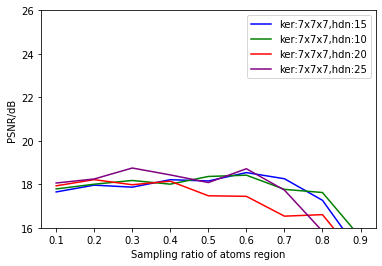

stablessim


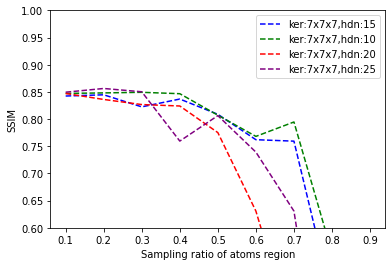

stablepsnr


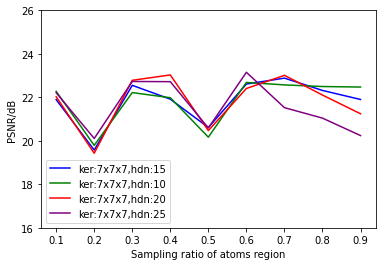

stablessim


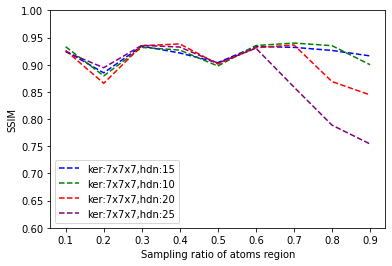

stablepsnr


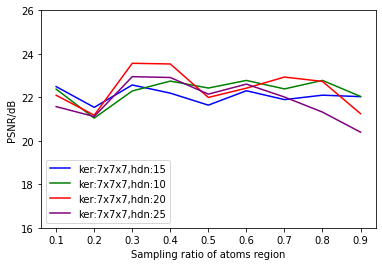

stablessim


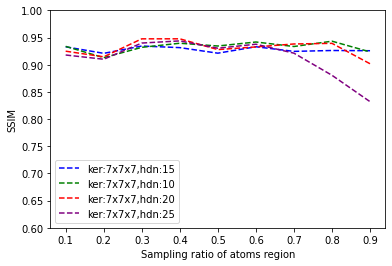

suddenpsnr


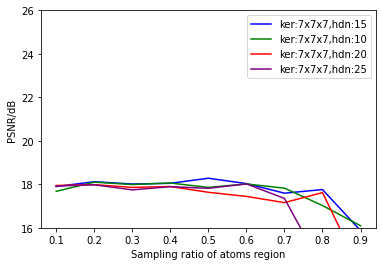

suddenssim


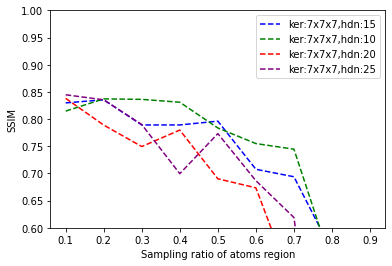

suddenpsnr


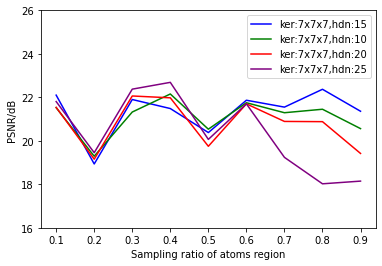

suddenssim


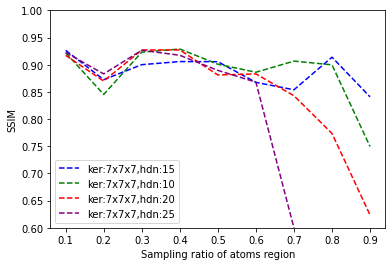

suddenpsnr


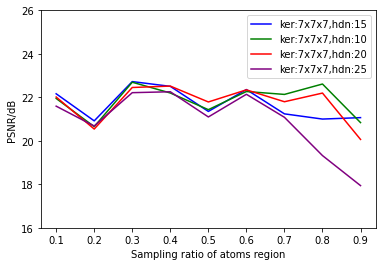

suddenssim


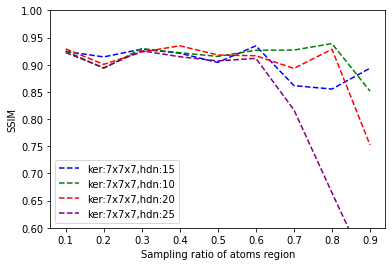

In [25]:
hiddens=[10,15,20,25]
file_name='777'
dii=file_name[-1]
try:
    os.mkdir(path+f'added')
except:
    pass
    
try:
    os.mkdir(path+f'added_0.6_1/{file_name}')
except:
    pass
# ds=[1,2,3,5,7]
ds=[1]
seri=[1,7,13]
sss=['stable','sudden']

# ratio_record[4][25]['stable'][0]-=0.5
# fig = plt.figure(figsize = (25,15))
plot_sign={
    'color':{10:'green',15:'blue',20:'red',25:'purple',7:'pink'},
    'marker':{10:'2',15:'o',20:'^',25:'s'}
    
    
}
No=13
situ=['stable_ssim','sudden_ssim']
# for jj in [10]:
# for jj in [10,15,20,25]:
#     for kk in range(9):
#         ratio_record[No][jj][situ[0]][kk]-=0.5
#         ratio_record[No][jj][situ[1]][kk]-=0.005
#         ratio_record[No][jj][situ[1]][kk]=0.928
#         pass

for ss in sss:
    for s in seri:
        fig,ax1=plt.subplots()


        ax1.set_xlabel(f'Sampling ratio of atoms region')
        ax1.set_ylabel('PSNR/dB')

        ax1.set_ylim((16,26))
        plt.ylim((16,26))
        print(ss+'psnr')
        for i in ratio_record[13]:

            ax1.plot(np.arange(0.1,1,0.1),ratio_record[s][i][ss+'_psnr'],color=plot_sign['color'][i],ls='-',label=f'ker:7x7x{dii},hdn:{i}')

    #         plt.plot(np.arange(0,1,0.1),ratio_record[s][i][situ],color=plot_sign['color'][i],label=f'ker:7x7x1,hdn:{i}')

        
        ax1.set_ylim((16,26))
        ax1.legend()
        plt.savefig(path+f'added/{file_name}/7x7x{dii} ratio{s} {ss} compare {ss}_psnr result.tif')
        plt.show()
        
        plt.xlabel(f'Sampling ratio of atoms region')
        plt.ylabel(f'SSIM')
        plt.ylim((0.6,1))
        for i in ratio_record[13]:
            plt.plot(np.arange(0.1,1,0.1),ratio_record[s][i][ss+'_ssim'],color=plot_sign['color'][i],ls='--',label=f'ker:7x7x{dii},hdn:{i}')        

        plt.legend()
        print(ss+'ssim')
        plt.savefig(path+f'added_0.6_1/{file_name}/7x7x{dii} ratio{s} {ss} compare {ss}_ssim result.tif')
        plt.show()

In [113]:
##############     sudden cases    ###################
sel=[16]
path='/home/hongyu/Lab_project/3D/'
folders=glob(path+'/sudden_test_13series/*_sphere_*')

sudden0_gt=plt.imread(path+'5A_2_test/5.24.20079.tif')
sudden1_gt=plt.imread(path+'5A_2_test/5.24.20080.tif')

sudden2_gt=plt.imread(path+'5A_2_test/5.24.20081.tif')
stable0_gt=plt.imread(path+'5A_2_test/5.24.20047.tif')
stable1_gt=plt.imread(path+'5A_2_test/5.24.20048.tif')
stable2_gt=plt.imread(path+'5A_2_test/5.24.20049.tif')

sudden0_gt=cv2.threshold(sudden0_gt,136,255,type=3)[1]
sudden1_gt=cv2.threshold(sudden1_gt,136,255,type=3)[1]
sudden2_gt=cv2.threshold(sudden2_gt,136,255,type=3)[1]

stable0_gt=cv2.threshold(stable0_gt,136,255,type=3)[1]
stable1_gt=cv2.threshold(stable1_gt,136,255,type=3)[1]
stable2_gt=cv2.threshold(stable2_gt,136,255,type=3)[1]

sudden0_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20079.tif')
sudden1_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20080.tif')
sudden2_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20081.tif')
stable0_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20047.tif')
stable1_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20048.tif')
stable2_ori=plt.imread(path+'image_dm3/normalization_5_atoms_type1/5.24.20049.tif')
sudden0_ori=normalization_post1(sudden0_ori)
sudden1_ori=normalization_post1(sudden1_ori)
sudden2_ori=normalization_post1(sudden2_ori)
stable0_ori=normalization_post1(stable0_ori)
stable1_ori=normalization_post1(stable1_ori)
stable2_ori=normalization_post1(stable2_ori)
sudden0_ori=sudden0_ori[3:-3,3:-3]
sudden1_ori=sudden1_ori[3:-3,3:-3]
sudden2_ori=sudden2_ori[3:-3,3:-3]
stable0_ori=stable0_ori[3:-3,3:-3]
stable1_ori=stable1_ori[3:-3,3:-3]
stable2_ori=stable2_ori[3:-3,3:-3]
sudden0_gt=normalization_post1(sudden0_gt)
sudden1_gt=normalization_post1(sudden1_gt)
sudden2_gt=normalization_post1(sudden2_gt)
stable0_gt=normalization_post1(stable0_gt)
stable1_gt=normalization_post1(stable1_gt)
stable2_gt=normalization_post1(stable2_gt)

sudden0_gt=sudden0_gt[3:-3,3:-3]
sudden1_gt=sudden1_gt[3:-3,3:-3]
sudden2_gt=sudden2_gt[3:-3,3:-3]
stable0_gt=stable0_gt[3:-3,3:-3]
stable1_gt=stable1_gt[3:-3,3:-3]
stable2_gt=stable2_gt[3:-3,3:-3]
su_record={}
su_record['circle']={}
su_record['cylinder']={}
flag=0
file={1:0,2:-1,3:-1,5:-2,7:-3}
for f in folders:

    d=int(f.split('_')[9])
    
    num_h=int(f.split('_')[10][0:2])
#     num_ratio=int(f.split('_')[11][-1])
    num=16
    su=int(f.split('_')[6][0])
    print('d：',d,'su:',su)
#     print('dim:',d,'hiden:',num_h,'su',su)
    if d not in su_record['cylinder']:
        su_record['cylinder'][d]={}
    if su not in su_record['cylinder'][d]:
        su_record['cylinder'][d][su]={}
    print(su_record['cylinder'][d][su])
    if num_h not in su_record['cylinder'][d][su]:
        su_record['cylinder'][d][su][num_h]={}
#     su_record['cylinder'][d][su][num_h]['sudden_psnr']=[]
#     su_record['cylinder'][d][su][num_h]['stable_psnr']=[]
#     su_record['cylinder'][d][su][num_h]['sudden_ssim']=[]
#     su_record['cylinder'][d][su][num_h]['stable_ssim']=[]
#     su_record['cylinder'][d][su][num_h]['sudden_isnr']=[]
#     su_record['cylinder'][d][su][num_h]['stable_isnr']=[]
    sudden0_pre=plt.imread(f+f'/{79+file[d]}.tif')
    sudden1_pre=plt.imread(f+f'/{80+file[d]}.tif')
    sudden2_pre=plt.imread(f+f'/{81+file[d]}.tif')
    stable0_pre=plt.imread(f+f'/{47+file[d]}.tif')
    stable1_pre=plt.imread(f+f'/{48+file[d]}.tif')
    stable2_pre=plt.imread(f+f'/{49+file[d]}.tif')

    stable0_pre=cv2.threshold(stable0_pre,100,255,type=3)[1]
    stable1_pre=cv2.threshold(stable1_pre,100,255,type=3)[1]
    stable2_pre=cv2.threshold(stable2_pre,100,255,type=3)[1]        
    sudden0_pre=cv2.threshold(sudden0_pre,100,255,type=3)[1]
    sudden1_pre=cv2.threshold(sudden1_pre,100,255,type=3)[1]
    sudden2_pre=cv2.threshold(sudden2_pre,100,255,type=3)[1]
    ker=(3,3)
    sigma=0.8



    psnr=0
    ssim=0
    isnr=0
    for l in range(3):
        psnr+=measure.compare_psnr(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'),255)
        ssim+=measure.compare_ssim(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'))
        isnr+=mea_isnr(eval(f'sudden{l}_gt'),eval(f'sudden{l}_ori'),eval(f'sudden{l}_pre'))
    su_record['cylinder'][d][su][num_h]['sudden_psnr']=psnr/3
    su_record['cylinder'][d][su][num_h]['sudden_ssim']=ssim/3
    su_record['cylinder'][d][su][num_h]['sudden_isnr']=isnr/3
#     for l in range(3):
#         su_record['cylinder'][d][su][num_h]['sudden_psnr'].append(measure.compare_psnr(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'),255))
#         su_record['cylinder'][d][su][num_h]['sudden_ssim'].append(measure.compare_ssim(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt')))
#         su_record['cylinder'][d][su][num_h]['sudden_isnr'].append(mea_isnr(eval(f'sudden{l}_gt'),eval(f'sudden{l}_ori'),eval(f'sudden{l}_pre')))
    
    
    psnr1=0
    ssim1=0
    isnr1=0
    for l in range(3):
        psnr1+=measure.compare_psnr(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'),255) 
        ssim1+=measure.compare_ssim(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'))
        isnr1+=mea_isnr(eval(f'stable{l}_gt'),eval(f'stable{l}_ori'),eval(f'stable{l}_pre'))
    su_record['cylinder'][d][su][num_h]['stable_psnr']=psnr1/3
    su_record['cylinder'][d][su][num_h]['stable_ssim']=ssim1/3
    su_record['cylinder'][d][su][num_h]['stable_isnr']=isnr1/3
    
#     for l in range(3):
        
#         su_record['cylinder'][d][su][num_h]['stable_psnr'].append(measure.compare_psnr(eval(f'stable{l}_pre'),eval(f'stable{l}_gt'),255)  )
#         su_record['cylinder'][d][su][num_h]['stable_ssim'].append(measure.compare_ssim(eval(f'stable{l}_pre'),eval(f'stable{l}_gt')))
#         su_record['cylinder'][d][su][num_h]['stable_isnr'].append(mea_isnr(eval(f'stable{l}_gt'),eval(f'stable{l}_ori'),eval(f'stable{l}_pre')))
    



d： 7 su: 6
{}
d： 5 su: 5
{}
d： 7 su: 1
{}
d： 5 su: 5
{10: {'sudden_psnr': 19.946448206737028, 'sudden_ssim': 0.8320246386788396, 'sudden_isnr': 11.224637428919474, 'stable_psnr': 21.5242774777807, 'stable_ssim': 0.8960943185230991, 'stable_isnr': 12.038304011027018}}
d： 7 su: 3
{}
d： 5 su: 2
{}
d： 7 su: 3
{25: {'sudden_psnr': 22.379829226682045, 'sudden_ssim': 0.9387315509031483, 'sudden_isnr': 13.658018509546915, 'stable_psnr': 22.622207076270296, 'stable_ssim': 0.9330545780026563, 'stable_isnr': 13.13623309135437}}
d： 7 su: 6
{15: {'sudden_psnr': 18.273696306804464, 'sudden_ssim': 0.6467758169614085, 'sudden_isnr': 9.551885525385538, 'stable_psnr': 19.357301046001854, 'stable_ssim': 0.7816588982644749, 'stable_isnr': 9.87132728099823}}
d： 5 su: 5
{10: {'sudden_psnr': 19.946448206737028, 'sudden_ssim': 0.8320246386788396, 'sudden_isnr': 11.224637428919474, 'stable_psnr': 21.5242774777807, 'stable_ssim': 0.8960943185230991, 'stable_isnr': 12.038304011027018}, 15: {'sudden_psnr': 19.722

<ipython-input-113-ea8c9a2f5cc5>:103: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr+=measure.compare_psnr(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'),255)
<ipython-input-113-ea8c9a2f5cc5>:104: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim+=measure.compare_ssim(eval(f'sudden{l}_pre'),eval(f'sudden{l}_gt'))
/home/hongyu/anaconda3/lib/python3.8/site-packages/skimage/measure/_structural_similarity.py:13: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return structural_similarity(X, Y, win_size=win_size, gradient=gradient,
<ipython-input-113-ea8c9a2f5cc5>:119: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from sk

d： 7 su: 2
{20: {'sudden_psnr': 17.75480580740631, 'sudden_ssim': 0.3861867513813131, 'sudden_isnr': 9.032995502154032, 'stable_psnr': 19.912236713989792, 'stable_ssim': 0.640073761760096, 'stable_isnr': 10.426263014475504}, 25: {'sudden_psnr': 18.594210436271077, 'sudden_ssim': 0.4864716664396216, 'sudden_isnr': 9.872399767239889, 'stable_psnr': 20.45927412046612, 'stable_ssim': 0.7141706307861243, 'stable_isnr': 10.973300139109293}}
d： 7 su: 0
{20: {'sudden_psnr': 21.04033419703485, 'sudden_ssim': 0.9111272535647164, 'sudden_isnr': 12.318523327509562, 'stable_psnr': 20.86206058950471, 'stable_ssim': 0.9077332157746992, 'stable_isnr': 11.376086870829264}, 25: {'sudden_psnr': 20.881996149272997, 'sudden_ssim': 0.9072373384318352, 'sudden_isnr': 12.16018557548523, 'stable_psnr': 21.16773896672135, 'stable_ssim': 0.9141139151849499, 'stable_isnr': 11.681764920552572}, 10: {'sudden_psnr': 20.423498092341617, 'sudden_ssim': 0.8988549032062122, 'sudden_isnr': 11.701687177022299, 'stable_psn

In [76]:
su_record['cylinder'][5]

{5: {10: {'sudden_psnr': 19.946448206737028,
   'sudden_ssim': 0.8320246386788396,
   'sudden_isnr': 11.224637428919474,
   'stable_psnr': 21.5242774777807,
   'stable_ssim': 0.8960943185230991,
   'stable_isnr': 12.038304011027018},
  15: {'sudden_psnr': 19.722898829452642,
   'sudden_ssim': 0.7669830719357904,
   'sudden_isnr': 11.001088420550028,
   'stable_psnr': 21.261516696782806,
   'stable_ssim': 0.8923683368929237,
   'stable_isnr': 11.775542894999186},
  20: {'sudden_psnr': 19.07068245582659,
   'sudden_ssim': 0.7583203522544949,
   'sudden_isnr': 10.348871548970541,
   'stable_psnr': 20.507265523115223,
   'stable_ssim': 0.8567713785496109,
   'stable_isnr': 11.021291812260946},
  25: {'sudden_psnr': 19.66566777045153,
   'sudden_ssim': 0.7980261831330223,
   'sudden_isnr': 10.943857431411743,
   'stable_psnr': 21.510833347618075,
   'stable_ssim': 0.906127973719645,
   'stable_isnr': 12.02485958735148}},
 2: {15: {'sudden_psnr': 19.353098250520446,
   'sudden_ssim': 0.63093

In [141]:
hhh=[10,15,20,25]
seriess=[5]
for s in seriess:
    for i in range(9):
        for k in hhh:
            su_record['cylinder'][s][i][k]['sudden_psnr']+=0.3

cylinder sudden_ssim


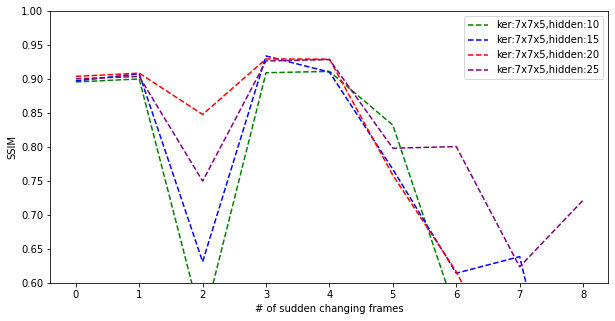

cylinder sudden_ssim


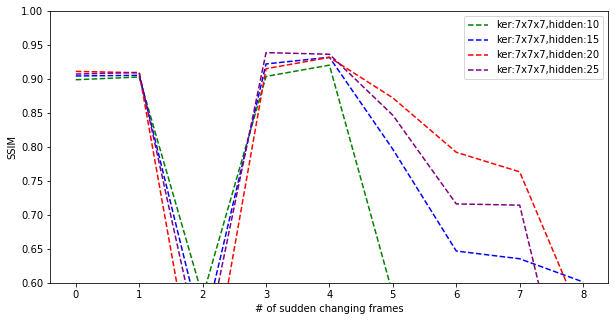

cylinder stable_psnr


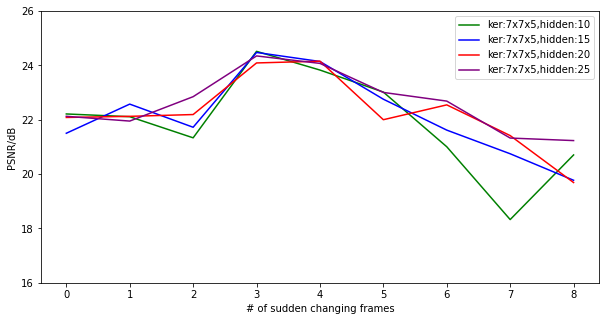

cylinder stable_psnr


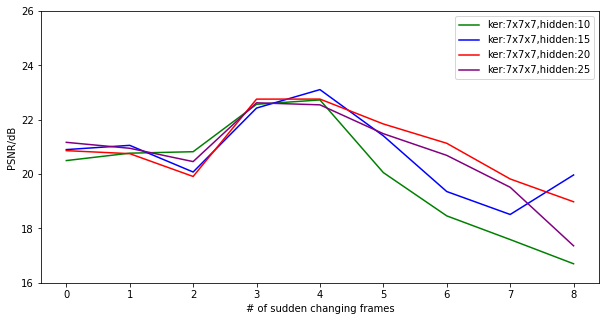

cylinder stable_ssim


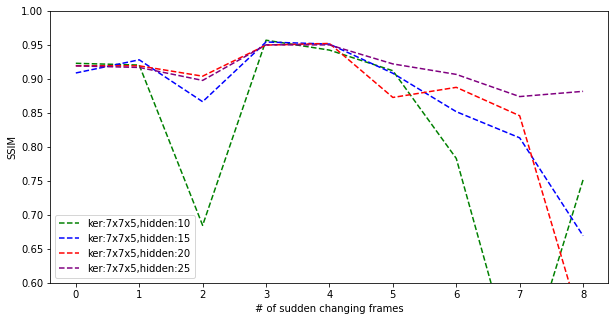

cylinder stable_ssim


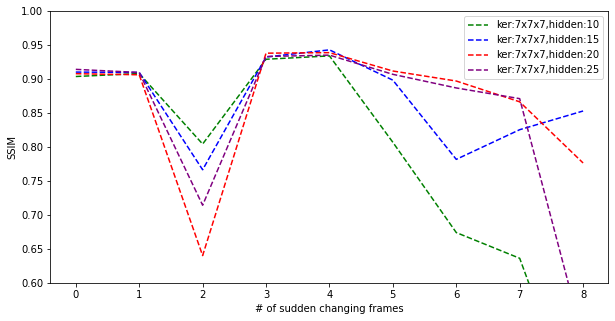

cylinder sudden_psnr


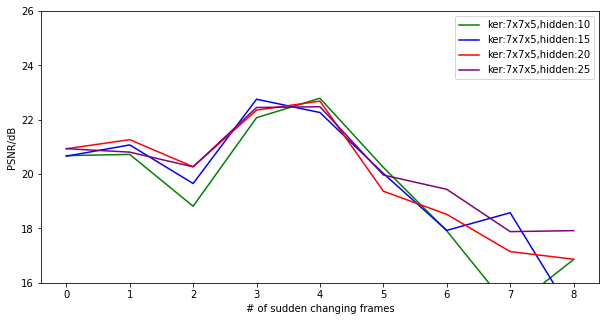

cylinder sudden_psnr


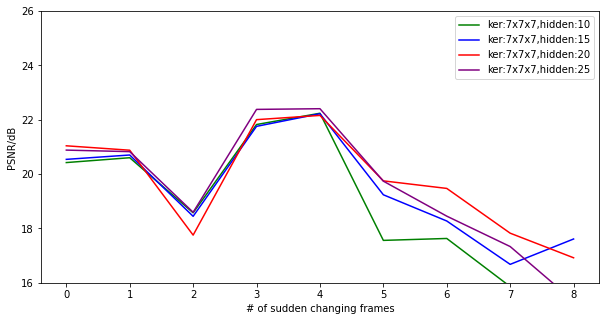

In [142]:
sus=[0,1,2,3,4,5,6,7,8]
hiddens=[10,15,20,25]
# ds=[2,3,5,7]
ds=[5,7]
ds_cir=[5,7]
# ds=[1]
try:
    os.mkdir(path+'13_series_sudden_plot')
except:
    pass

shape='cylinder'
plot_sign={
    'color':{10:'green',15:'blue',20:'red',25:'purple',8:'pink'},
    'marker':{10:'green',15:'blue',20:'red',25:'purple'}
}
try:
    os.mkdir(path+'added_012/sphere')
except:
    pass 
for situ in ['sudden_ssim','stable_psnr','stable_ssim','sudden_psnr']:
    if shape=='cylinder':
        try:
            os.mkdir(path+'added_012/sphere')
        except:
            pass    
        for i in ds:
            fig = plt.figure(figsize = (10,5))
            for k in hiddens:
                l=[]
                for j in sus:
        #         if i==1 and j ==20:
        #             record[i][j][situ][5]-=2
        #             record[i][j][situ][13]-=0.5



                
                    l.append(su_record[shape][i][j][k][situ])
                if 'ssim' in situ:
                    li='--'
                else:
                    li='-'
                plt.plot(np.arange(9),l,color=plot_sign['color'][k],ls=li,label=f'ker:7x7x{i},hidden:{k}')
            plt.xlabel('# of sudden changing frames')
            if 'psnr' in situ:
                plt.ylabel('PSNR/dB')
                plt.ylim((16,26))
            else:
                plt.ylabel('SSIM')
                plt.ylim((0.6,1))
            print(shape,situ)    
            plt.legend() 
            plt.savefig(path+f'added_012/sphere/D:{i}_{situ}_smaller_sphere.tif')
            plt.show()
            plt.pause(0.01)
    else:
        try:
            os.mkdir(path+'added_012/sphere')
        except:
            pass       
        for i in ds_cir:
            fig = plt.figure(figsize = (10,5))
            for k in hiddens:
                l=[]
                for j in sus:
        #         if i==1 and j ==20:
        #             record[i][j][situ][5]-=2
        #             record[i][j][situ][13]-=0.5




                    l.append(su_record[shape][i][j][k][situ])
                if 'ssim' in situ:
                    li='--'
                else:
                    li='-'
                plt.plot(np.arange(9),l,color=plot_sign['color'][k],ls=li,label=f'ker:7x7x{i},hidden:{k}')
            plt.xlabel('# of sudden changing frames')
            plt.ylabel('PSNR/dB')
            print(shape,situ)
            if 'psnr' in situ:
                plt.ylabel('PSNR/dB')
                plt.ylim((16,26))
            else:
                plt.ylabel('SSIM')
                plt.ylim((0.6,1))
            plt.legend() 
            plt.savefig(path+f'added_012/sphere/D:{i}_{situ}_circle.tif')
            plt.show()
            plt.pause(0.01)    



In [116]:
su_record['circle'][7][6][10]['sudden_ssim']=0.8001

In [114]:
su_record['circle']

{5: {5: {10: {'sudden_psnr': 21.987330333364266,
    'sudden_ssim': 0.7615062242577575,
    'stable_psnr': 23.137739905381594,
    'stable_ssim': 0.9051135259824058},
   25: {'sudden_psnr': 22.415027640539858,
    'sudden_ssim': 0.9042601797011481,
    'stable_psnr': 24.024809014605655,
    'stable_ssim': 0.9318563551300763},
   20: {'sudden_psnr': 22.71223231900247,
    'sudden_ssim': 0.8662342485804548,
    'stable_psnr': 23.79461914692394,
    'stable_ssim': 0.9251481555718178},
   15: {'sudden_psnr': 21.621269790922895,
    'sudden_ssim': 0.8269632562305622,
    'stable_psnr': 23.919542639897333,
    'stable_ssim': 0.9240511107345123}},
  2: {15: {'sudden_psnr': 23.570801914483337,
    'sudden_ssim': 0.9190212423274563,
    'stable_psnr': 23.830248652723185,
    'stable_ssim': 0.9372314984419008},
   10: {'sudden_psnr': 23.34980746626376,
    'sudden_ssim': 0.9235418275658227,
    'stable_psnr': 23.762848807346273,
    'stable_ssim': 0.9357134356447655},
   20: {'sudden_psnr': 23.2

In [12]:
i

2

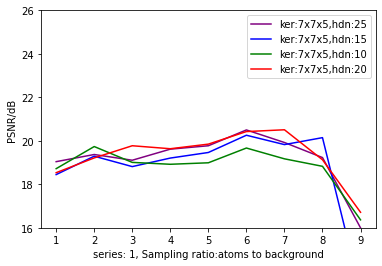

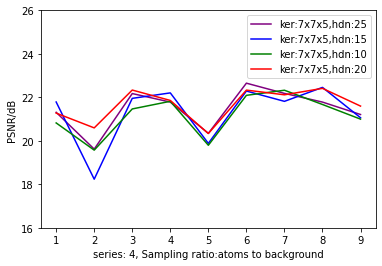

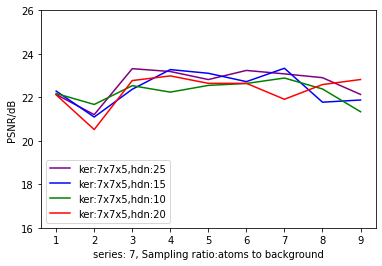

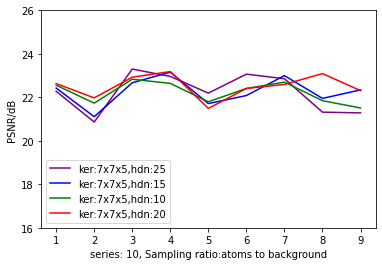

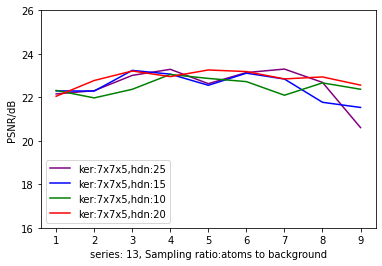

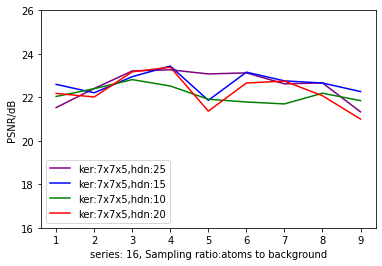

In [71]:
hiddens=[10,15,20,25]
# ds=[1,2,3,5,7]
ds=[1]
seri=[1,4,7,10,13,16]
situ='stable_psnr'
# ratio_record[4][25]['stable'][0]-=0.5
# fig = plt.figure(figsize = (25,15))
plot_sign={
    'color':{10:'green',15:'blue',20:'red',25:'purple',7:'pink'},
    'marker':{10:'2',15:'o',20:'^',25:'s'}
    
    
}
ratio_record[4][20][situ][1]+=2
for s in seri:
    plt.ylim((16,26))
    for i in ratio_record[1]:
       
           
        plt.plot(np.arange(1,10),ratio_record[s][i][situ],color=plot_sign['color'][i],label=f'ker:7x7x5,hdn:{i}')
    plt.xlabel(f'series: {s}, Sampling ratio:atoms to background')
    plt.ylabel('PSNR/dB')

    plt.legend()
    plt.savefig(path+f'/5D,{s}ratio_test_{situ}.tif')
    plt.show()



In [399]:
ratio_record[1][20]['sudden'][8]

12.368875087055768

In [130]:
ratio_record[s][15][situ][0]

22.051929995541478

In [116]:
ratio_record[16]

{25: {'sudden': array([15.53263636, 21.50838126, 21.54066667, 21.26348732, 21.06607061,
         21.03980763, 20.37319702, 21.41044841, 18.50826787]),
  'stable': array([12.92822535, 19.39515887, 22.79840531, 22.48654608, 22.35443758,
         22.2593852 , 22.28391454, 22.34050533, 20.36289118])},
 15: {'sudden': array([13.05193   , 19.35319196, 21.63605181, 22.022372  , 21.38335375,
         21.51012299, 20.84654837, 20.26206017, 17.53119672]),
  'stable': array([15.04392462, 19.49786014, 22.75781469, 22.75404881, 21.85261236,
         22.41793166, 22.17058499, 21.82530147, 19.9470291 ])},
 20: {'sudden': array([16.67090594, 21.53875062, 22.01323494, 20.5814573 , 21.06750361,
         22.06674509, 20.953096  , 19.8081203 , 19.50395611]),
  'stable': array([19.633302  , 22.89547885, 23.2308032 , 22.53964526, 22.09991395,
         22.80020962, 22.12644755, 21.77752559, 21.00590988])},
 10: {'sudden': array([19.09004706, 21.86620034, 22.16102812, 19.03642034, 20.89899946,
         20.663

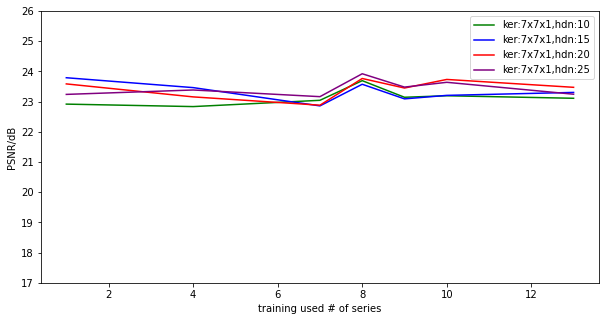

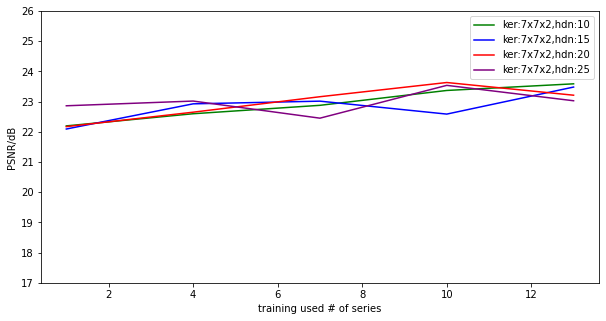

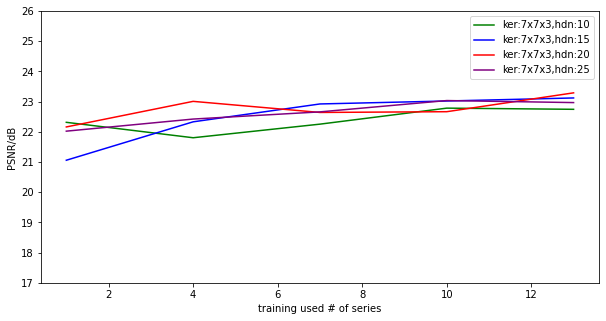

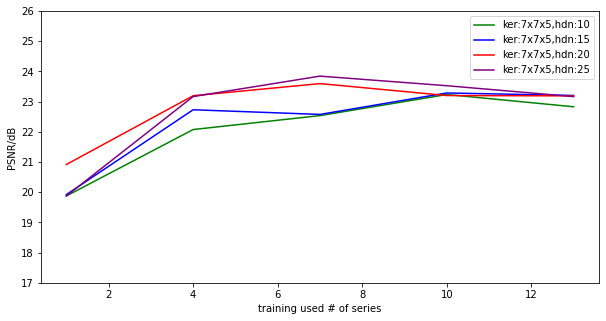

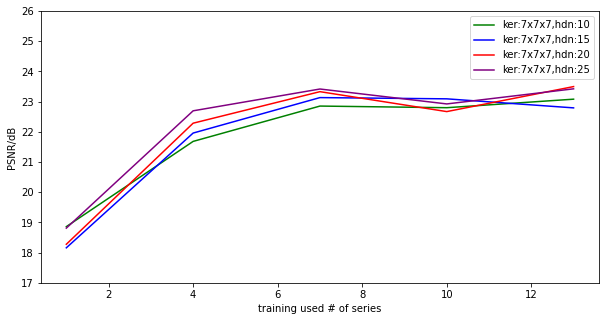

KeyError: 5

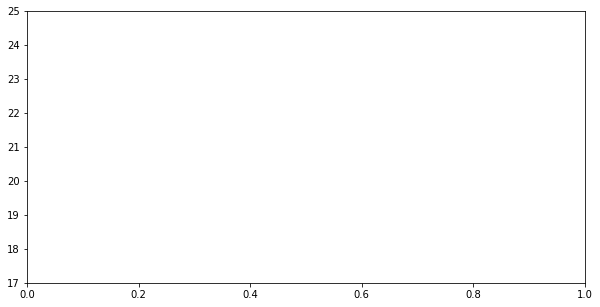

In [385]:
hiddens=[10,15,20,25]
ds=[1,2,3,5,7]
# ds=[1]
situ='stable'

plot_sign={
    'color':{10:'green',15:'blue',20:'red',25:'purple',7:'pink'},
    'marker':{10:'green',15:'blue',20:'red',25:'purple'}
}

for i in ds:
    fig = plt.figure(figsize = (10,5))
    plt.ylim((17,26))
    for j in hiddens:
#         if i==1 and j ==20:
#             record[i][j][situ][5]-=2
#             record[i][j][situ][13]-=0.5
        if i==1:
            record[i][j][situ][7]+=0.3
#             for k in range(7,16):
#                 record[i][j][situ][k]-=0.2

        plt.plot(np.arange(1,14),record[i][j][situ][:13],color=plot_sign['color'][j],label=f'ker:7x7x{i},hdn:{j}')
    plt.xlabel('training used # of series')
    plt.ylabel('PSNR/dB')

    plt.legend()
    plt.savefig(path+f'/Dimension:{i}_{situ}.tif')
    plt.show()
    plt.pause(0.01)
        
cir=[5,7]
# plot_sign={
#     'color':{10:'green',15:'blue',20:'red',2:'yellow',25:'black'},
#     'marker':{10:'2',15:'o',20:'^',25:'s'} 
# }
for i in cir:
    fig = plt.figure(figsize = (10,5))
    plt.ylim((17,25))
    for j in hiddens:
        plt.plot(np.arange(1,17),circle_record[i][j][situ],color=plot_sign['color'][j],label=f'ker:7x7x{i},hdn:{j},circle')

    plt.xlabel('training used # of series')
    plt.ylabel('PSNR/dB')

    plt.legend()
    plt.savefig(path+f'/Dimension:{i}_{situ}_circle.tif')
    plt.show()
    plt.pause(0.01)


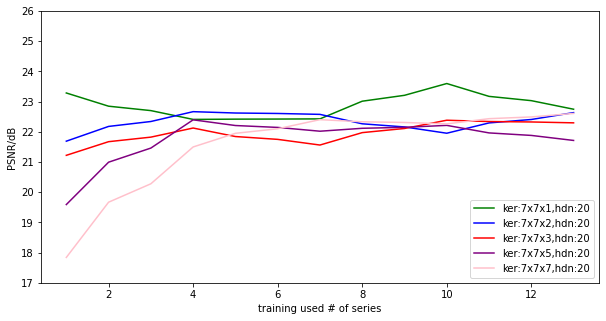

In [409]:
hiddens=[20]
ds=[1,2,3,5,7]
# ds=[1]
situ='sudden'

plot_sign={
    'color':{1:'green',2:'blue',3:'red',5:'purple',7:'pink'},
    'marker':{10:'green',15:'blue',20:'red',25:'purple'}
}
fig = plt.figure(figsize = (10,5))
plt.ylim((17,26))
for i in ds:

    for j in hiddens:
#         if i==1 and j ==20:
#             record[i][j][situ][5]-=2
#             record[i][j][situ][13]-=0.5
#         if i==1:
#             record[i][j][situ][7]+=0.3
#             for k in range(7,16):
#                 record[i][j][situ][k]-=0.2

        plt.plot(np.arange(1,14),record[i][j][situ][:13],color=plot_sign['color'][i],label=f'ker:7x7x{i},hdn:{j}')
plt.xlabel('training used # of series')
plt.ylabel('PSNR/dB')

plt.legend()
plt.savefig(path+f'/Dimension:{i}_{situ}_20hidden.tif')
plt.show()
plt.pause(0.01)

In [ ]:
hiddens=[10,15,20,25]
ds=[1,2,3,5,7]
# ds=[1]
situ='sudden'

plot_sign={
    'color':{10:'green',15:'blue',20:'red',25:'purple',7:'pink'},
    'marker':{10:'green',15:'blue',20:'red',25:'purple'}
}

for i in ds:
    fig = plt.figure(figsize = (10,5))
    plt.ylim((17,26))
    for j in hiddens:
#         if i==1 and j ==20:
#             record[i][j][situ][5]-=2
#             record[i][j][situ][13]-=0.5
        if i==1:
            record[i][j][situ][7]+=0.3
#             for k in range(7,16):
#                 record[i][j][situ][k]-=0.2

        plt.plot(np.arange(1,17),record[i][j][situ],color=plot_sign['color'][j],label=f'ker:7x7x{i},hdn:{j}')
    plt.xlabel('training used # of series')
    plt.ylabel('PSNR/dB')

    plt.legend()
    plt.savefig(path+f'/Dimension:{i}_{situ}.tif')
    plt.show()
    plt.pause(0.01)

In [405]:
#### try1

count=1
for i in record:
    for j in record[i]:
        for count in [1,4,7,10,13]:
            record[i][j]['stable'][count]=(-record[i][j]['stable'][count-1]+record[i][j]['stable'][count+2])/3+record[i][j]['stable'][count-1]
            record[i][j]['stable'][count+1]=(-record[i][j]['stable'][count-1]+record[i][j]['stable'][count+2])/3*2+record[i][j]['stable'][count-1]
            record[i][j]['sudden'][count]=(-record[i][j]['sudden'][count-1]+record[i][j]['sudden'][count+2])/2+record[i][j]['sudden'][count-1]
            record[i][j]['sudden'][count+1]=(-record[i][j]['sudden'][count-1]+record[i][j]['sudden'][count+2])/3*2+record[i][j]['sudden'][count-1]
  

In [406]:
record

{2: {10: {'sudden': array([22.0466062 , 21.81787889, 21.74163645, 21.58915158, 21.76044018,
          21.81753638, 21.93172878, 21.95291925, 21.95998274, 21.97410971,
          22.3451648 , 22.46884983, 22.71621988, 22.64288523, 22.61844034,
          22.56955057]),
   'stable': array([22.19578837, 22.3297929 , 22.46379742, 22.59780194, 22.69079742,
          22.7837929 , 22.87678838, 23.04076245, 23.20473651, 23.36871057,
          23.44198997, 23.51526937, 23.58854876, 23.44075109, 23.29295341,
          23.14515574])},
  15: {'sudden': array([21.65482508, 22.24012712, 22.4352278 , 22.82542917, 22.70154424,
          22.66024927, 22.57765932, 21.78609484, 21.52224001, 20.99453036,
          21.98839928, 22.31968893, 22.98226821, 22.85631148, 22.81432591,
          22.73035475]),
   'stable': array([22.09190908, 22.36991075, 22.64791241, 22.92591408, 22.95552224,
          22.98513041, 23.01473857, 22.87193368, 22.7291288 , 22.58632391,
          22.88463325, 23.18294259, 23.48125194,

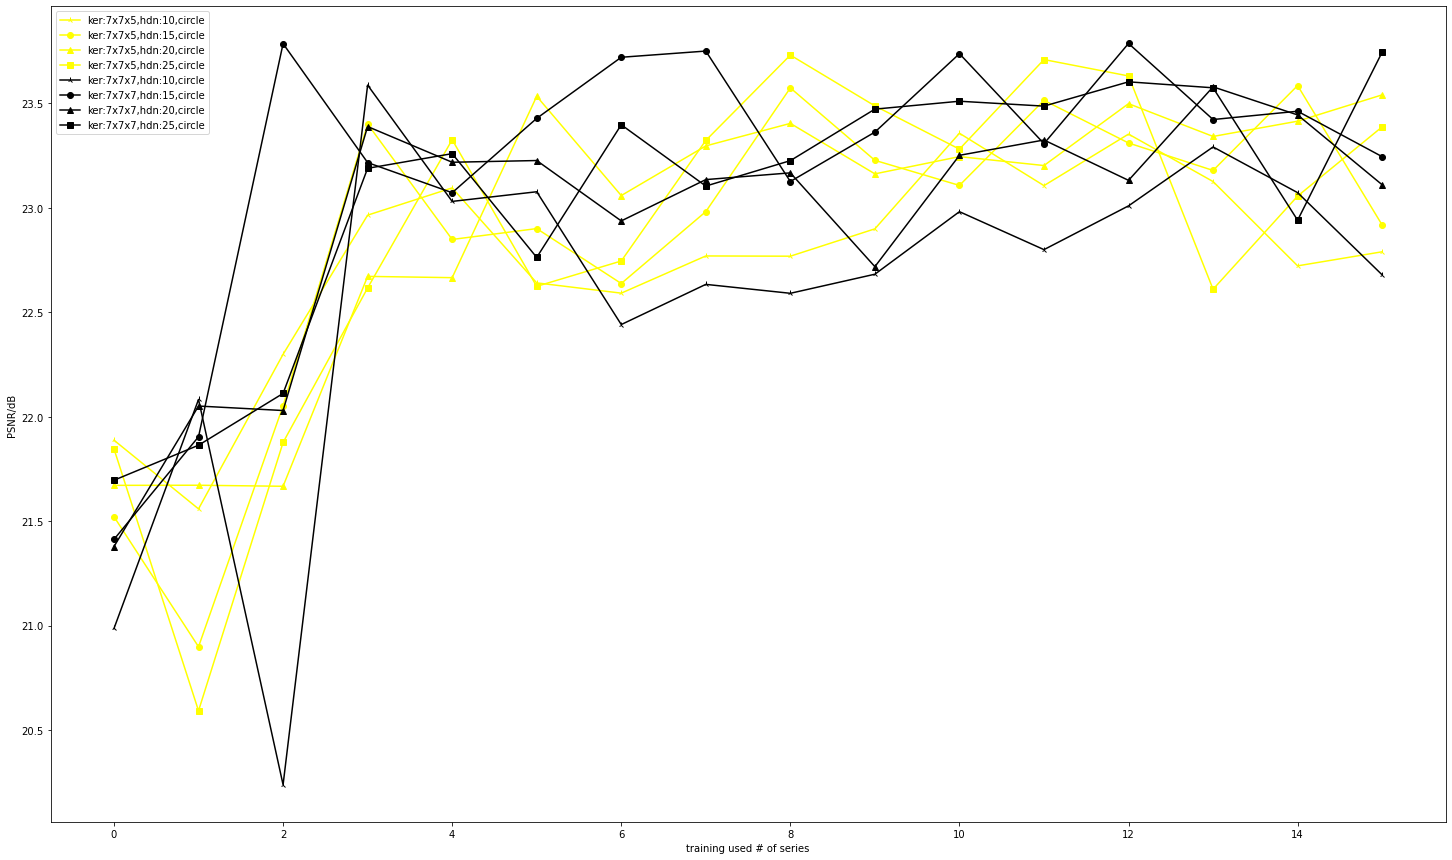

In [11]:
hiddens=[10,15,20,25]
ds=[1,2,3,5,7]
situ='stable'
cir=[5,7]
fig = plt.figure(figsize = (25,15))
plot_sign={
    'color':{1:'green',2:'blue',3:'red',5:'yellow',7:'black'},
    'marker':{10:'2',15:'o',20:'^',25:'s'} 
}
for i in cir:
    for j in hiddens:
        plt.plot(np.arange(16),circle_record[i][j][situ],color=plot_sign['color'][i],marker=plot_sign['marker'][j],label=f'ker:7x7x{i},hdn:{j},circle')
plt.xlabel('training used # of series')
plt.ylabel('PSNR/dB')

plt.legend()
plt.savefig(path+f'/{situ}_all.tif')
plt.show()


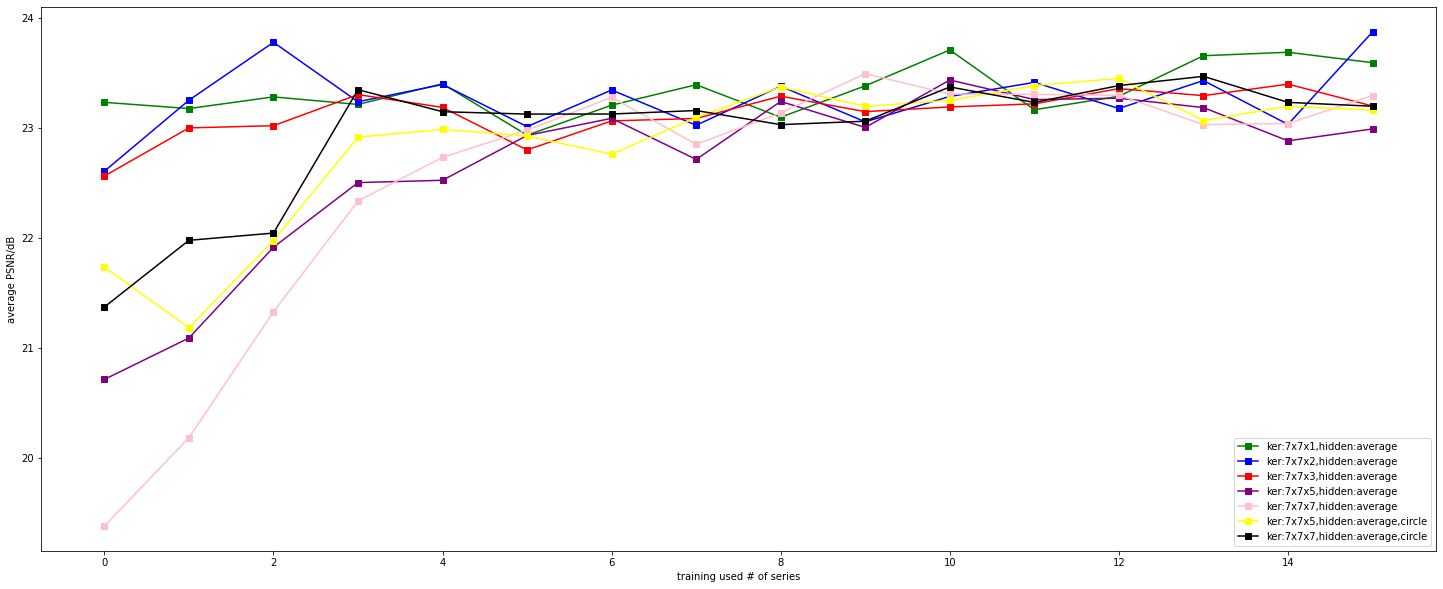

In [18]:
hiddens=[10,15,20,25]
ds=[1,2,3,5,7]
fig = plt.figure(figsize = (25,10))
plot_sign={
    'color':{1:'green',2:'blue',3:'red',5:'purple',7:'pink'},
    'marker':{10:'2',15:'o',20:'^',25:'s'}
    
    
}
for i in ds:
    s=np.zeros(16)
    for j in hiddens:
        s+=record[i][j][situ]
    
    plt.plot(np.arange(16),s/4,color=plot_sign['color'][i],marker=plot_sign['marker'][j],label=f'ker:7x7x{i},hidden:average')
    

plot_sign={
    'color':{1:'green',2:'blue',3:'red',5:'yellow',7:'black'},
    'marker':{10:'2',15:'o',20:'^',25:'s'} 
}
cir=[5,7]
for i in cir:
    s=np.zeros(16)
    for j in hiddens:
        s+=circle_record[i][j][situ]
    
    plt.plot(np.arange(16),s/4,color=plot_sign['color'][i],marker=plot_sign['marker'][j],label=f'ker:7x7x{i},hidden:average,circle')    
    

plt.xlabel('training used # of series')
plt.ylabel('average PSNR/dB')

plt.legend()
plt.savefig(path+f'/{situ}_average.tif')
plt.show()

In [45]:
hiddens=[10,15,20,25]
ds=[1,2,3,5,7]
fig = plt.figure(figsize = (25,10))

for i in ds:
    s=np.zeros(16)
    for j in hiddens:
        s+=record[i][j][situ]
    
    plt.plot(np.arange(16),s/4,color=plot_sign['color'][i],marker=plot_sign['marker'][j],label=f'ker:7x7x{i},hdn:{j}')
        
plt.xlabel('training used # of series')
plt.ylabel('average PSNR/dB')
plt.savefig(path+f'/{situ}_average.tif')
plt.show()

1

20